In [22]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from statistics import mean
from scipy.optimize import curve_fit
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing

In [21]:
source_dir = "D:/School/IIT-PHD/FIeld Study/Parametrics/chicagoSolarRad"

files = os.listdir(source_dir)
os.chdir(source_dir)

# test_file = "D:/School/IIT-PHD/Parametric results/Field Paper/p4_AlbuquerqueNM_Base Elec_NV_BRHourlyHeat.csv"

heating_setpoint = 22.22222
cooling_setpoint = 25


master_results = pd.DataFrame()
for file in files:
    if 'HourlyHeat' in str(file):
        file_name = str(file)

        outage_type = "Heating"


        climate = file_name.split('_')[1]
        case = file_name.split('_')[2]

        df = pd.read_csv(file)

        IDB = list(df['ZONE1_OCC:Zone Air Temperature [C](Hourly)'])
        ODB = list(df['Environment:Site Outdoor Air Drybulb Temperature [C](Hourly)'])
        diffuse_rad = list(df['Environment:Site Diffuse Solar Radiation Rate per Area [W/m2](Hourly)'])
        direct_rad = list(df['Environment:Site Direct Solar Radiation Rate per Area [W/m2](Hourly)'])

        IDB_DH_24 = []
        ODB_DH_24 = []
        ODB_Avg_24 = []
        direct_rad_24 = []
        diffuse_rad_24 = []

        for temp in range(24):
            IDB_DH_24.append(heating_setpoint - IDB[temp])
            ODB_DH_24.append(heating_setpoint - ODB[temp])
            ODB_Avg_24.append(ODB[temp])
            diffuse_rad_24.append(diffuse_rad[temp])
            direct_rad_24.append(direct_rad[temp])
        ratio_24 = sum(IDB_DH_24)/sum(ODB_DH_24)
        average_24 = mean(ODB_Avg_24)
        total_rad_24 = (sum(direct_rad_24) + sum(diffuse_rad_24)) 

        IDB_DH_48 = []
        ODB_DH_48 = []
        ODB_Avg_48 = []

        for temp in range(48):
            IDB_DH_48.append(heating_setpoint - IDB[temp])
            ODB_DH_48.append(heating_setpoint - ODB[temp])
            ODB_Avg_48.append(ODB[temp])
        ratio_48 = sum(IDB_DH_48)/sum(ODB_DH_48)
        average_48 = mean(ODB_Avg_48)

        IDB_DH_168 = []
        ODB_DH_168 = []
        ODB_Avg_168 = []

        for temp in range(168):
            IDB_DH_168.append(heating_setpoint - IDB[temp])
            ODB_DH_168.append(heating_setpoint - ODB[temp])
            ODB_Avg_168.append(ODB[temp])
        ratio_168 = sum(IDB_DH_168)/sum(ODB_DH_168)
        average_168 = mean(ODB_Avg_168)

        new_row = pd.DataFrame({
            'Climate':[str(climate)],
            'Case':[str(case)],
            'Outage Type':[str(outage_type)],
            '24 hr Ratio':[ratio_24],
            '48 hr Ratio':[ratio_48],
            '168 hr Ratio':[ratio_168],
            '24 Avg ODB':[average_24],
            '48 Avg ODB':[average_48],
            '168 Avg ODB':[average_168],
            'Total 24 hr Radiation':[total_rad_24]
            })
        
        master_results = pd.concat([master_results,new_row], ignore_index=True)

    if 'HourlyCool' in str(file):
        file_name = str(file)

        outage_type = "Cooling"


        climate = file_name.split('_')[1]
        case = file_name.split('_')[2]

        df = pd.read_csv(file)

        IDB = list(df['ZONE1_OCC:Zone Air Temperature [C](Hourly)'])
        ODB = list(df['Environment:Site Outdoor Air Drybulb Temperature [C](Hourly)'])

        IDB_DH_24 = []
        ODB_DH_24 = []

        for temp in range(24):
            IDB_DH_24.append(cooling_setpoint - IDB[temp])
            ODB_DH_24.append(cooling_setpoint - ODB[temp])
        ratio_24 = sum(IDB_DH_24)/sum(ODB_DH_24)

        IDB_DH_48 = []
        ODB_DH_48 = []

        for temp in range(48):
            IDB_DH_48.append(cooling_setpoint - IDB[temp])
            ODB_DH_48.append(cooling_setpoint - ODB[temp])
        ratio_48 = sum(IDB_DH_48)/sum(ODB_DH_48)

        IDB_DH_168 = []
        ODB_DH_168 = []

        for temp in range(168):
            IDB_DH_168.append(cooling_setpoint - IDB[temp])
            ODB_DH_168.append(cooling_setpoint - ODB[temp])
        ratio_168 = sum(IDB_DH_168)/sum(ODB_DH_168)

        new_row = pd.DataFrame({
            'Climate':[str(climate)],
            'Case':[str(case)],
            'Outage Type':[str(outage_type)],
            '24 hr Ratio':[ratio_24],
            '48 hr Ratio':[ratio_48],
            '168 hr Ratio':[ratio_168]
            })
        
        master_results = pd.concat([master_results,new_row], ignore_index=True)
        

master_results.head()
master_results.to_csv('master_results.csv')



['Feb 3-10', 'Mar 1-7', 'Extreme Jan 27-Feb 2', 'Feb 11-18', 'Jan 16-23', 'Jan 8-15', 'Feb 18-25', 'Apr 15-22']
0.775
0.789
0.799
0.792
0.798
0.809
0.8
0.753


C:\Users\amitc_crl\AppData\Local\Temp\ipykernel_26664\2314882180.py:40: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(gr_24, set_hours, 'o', color=colors[count], marker=markers[count], label=(str(climate)+


Text(0, 0.5, 'SET Hours [°C]')

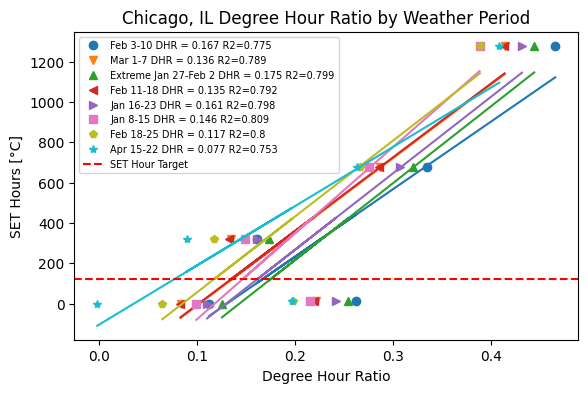

In [7]:
data_file = "D:/School/IIT-PHD/FIeld Study/Parametrics/chicago/master_results2.csv"

df = pd.read_csv(data_file)

climates = ['Feb 3-10', 'Mar 1-7', 'Extreme Jan 27-Feb 2', 'Feb 11-18', 'Jan 16-23', 'Jan 8-15', 'Feb 18-25', 'Apr 15-22']

print(climates)

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:pink', 'tab:olive', 'tab:cyan']
markers = ['o', 'v', '^', '<', '>', 's', 'p', '*']


count = 0

dhr_chi = []
avg_t_chi = []

fig = plt.figure()
fig.set_size_inches(6.5, 4)

for climate in climates:


    row = df[df['Climate'] == str(climate)]

    gr_24 = row['24 hr Ratio']
    gr_48 = row['48 hr Ratio']
    gr_168 = row['168 hr Ratio']
    set_hours = row['SET Hours']

    avg_t_climate = list(row['24 Avg ODB'])[0]
    # print(avg_t_climate)
    avg_t_chi.append(avg_t_climate)

    
    m_24, b_24 = np.polyfit(gr_24, set_hours, 1)
    ratio_target = round((120 -b_24)/m_24, 3)
    R = np.corrcoef(gr_24, set_hours)[0,1]
    R_Squared_24 = round(R*R,3)
    plt.plot(gr_24, set_hours, 'o', color=colors[count], marker=markers[count], label=(str(climate)+ 
            " DHR = " + str(ratio_target) + ' R2=' + str(R_Squared_24)))
    plt.plot(gr_24, m_24*gr_24+b_24, color=colors[count],)

    dhr_chi.append(ratio_target)


    # plt.plot(gr_48, set_hours, 'o', color='orange')
    # m_48, b_48 = np.polyfit(gr_48, set_hours, 1)
    # plt.plot(gr_48, m_48*gr_48+b_48, color='orange')

    # R = np.corrcoef(gr_48, set_hours)[0,1]
    # R_Squared_48 = R*R

    # plt.plot(gr_168, set_hours, 'o', color='green')
    # m_168, b_168 = np.polyfit(gr_168, set_hours, 1)
    # plt.plot(gr_168, m_168*gr_168+b_168, color='green')

    # R = np.corrcoef(gr_168, set_hours)[0,1]
    # R_Squared_168 = R*R

    print(R_Squared_24)
    # print(R_Squared_48)
    # print(R_Squared_168)

    count = count + 1



plt.axhline(y=120, color='r', linestyle='--', label='SET Hour Target')
plt.legend(fontsize=7)
plt.title('Chicago, IL Degree Hour Ratio by Weather Period')
plt.xlabel('Degree Hour Ratio')
plt.ylabel('SET Hours [°C]')



{'24-Mar', '2-Jan', '24-Feb', '3-Jan', '26-Jan', '1-Jan', '8-Feb', '29-Mar', '9-Mar', '9-Jan', '4-Feb', '17-Feb', '17-Mar', '21-Mar', '12-Jan', '28-Jan', '23-Feb', '9-Feb', '5-Feb', '21-Jan', '20-Feb', '14-Mar', '27-Jan', '1-Feb', '6-Feb', '7-Feb', '4-Jan', '13-Feb', '13-Mar', '7-Jan', '14-Jan', '16-Jan', '17-Jan', '1-Mar', '13-Jan', '14-Feb', '22-Jan', '12-Mar', '31-Mar', '19-Feb', '10-Jan', '20-Mar', '18-Jan', '25-Mar', '19-Mar', '30-Mar', '26-Feb', '12-Feb', '6-Jan', '18-Feb', '26-Mar', '15-Feb', '25-Jan', '16-Mar', '22-Mar', '15-Mar', '20-Jan', '29-Jan', '8-Jan', '11-Mar', '5-Jan', '24-Jan', '1-Apr', '15-Jan', '22-Feb', '10-Feb', '30-Jan', '19-Jan', '27-Mar', '4-Mar', '25-Feb', '27-Feb', '10-Mar', '3-Feb', '5-Mar', '28-Mar', '18-Mar', '8-Mar', '6-Mar', '23-Mar', '2-Mar', 'Extreme', '11-Jan', '2-Feb', '3-Mar', '11-Feb', '31-Jan', '7-Mar', '23-Jan', '28-Feb', '21-Feb', '16-Feb'}
0.79
0.816
0.79
0.796
0.799
0.815
0.81
0.809
0.789
0.8
0.786
0.802
0.778
0.802
0.803
0.794
0.797
0.789
0.7

Text(0, 0.5, 'SET Hours [°C]')

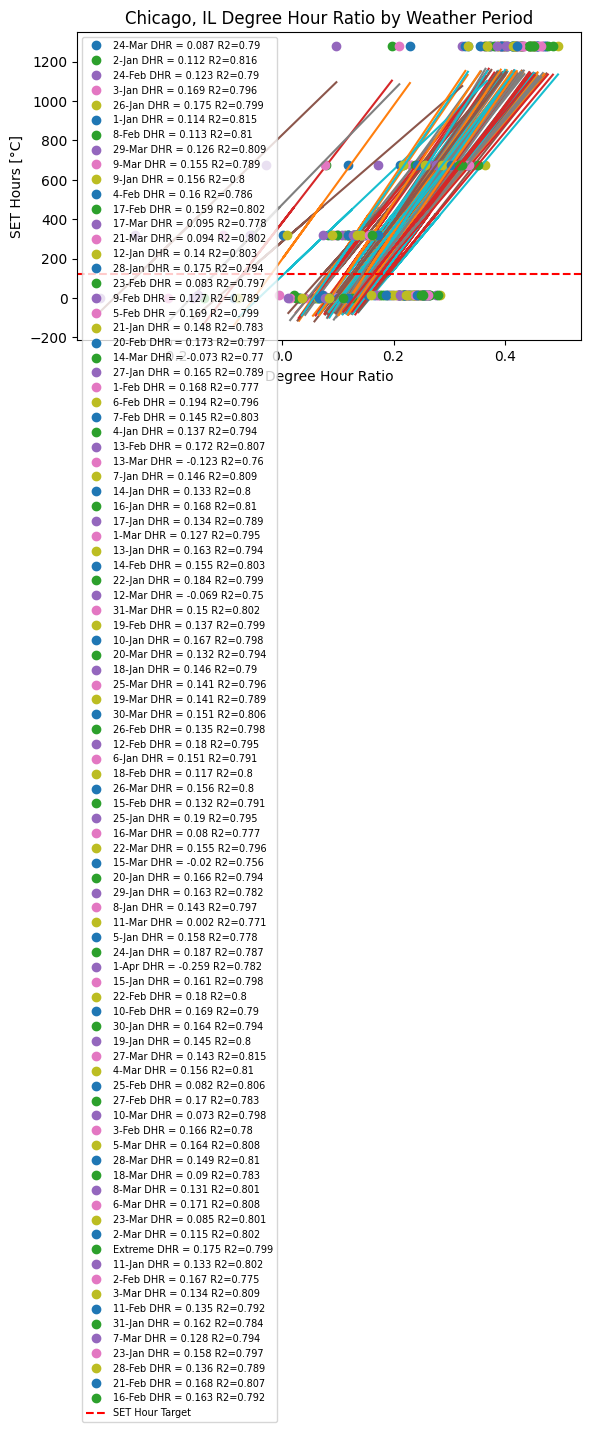

In [2]:
# Chicago Full Run
data_file = "D:/School/IIT-PHD/FIeld Study/Parametrics/chicagoSolarRad/master_results_solarRad.csv"

df = pd.read_csv(data_file)

climates = set(list(df['Climate']))
# climates = ['Feb 3-10', 'Mar 1-7', 'Extreme Jan 27-Feb 2', 'Feb 11-18', 'Jan 16-23', 'Jan 8-15', 'Feb 18-25', 'Apr 15-22']

print(climates)

# colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:pink', 'tab:olive', 'tab:cyan']
# markers = ['o', 'v', '^', '<', '>', 's', 'p', '*']


count = 0

dhr_chi = []
avg_t_chi = []
solar_rad_chi = []

fig = plt.figure()
fig.set_size_inches(6.5, 4)

for climate in climates:


    row = df[df['Climate'] == str(climate)]

    gr_24 = row['24 hr Ratio']
    gr_48 = row['48 hr Ratio']
    gr_168 = row['168 hr Ratio']
    set_hours = row['SET Hours']

    avg_t_climate = list(row['24 Avg ODB'])[0]
    solar_rad = list(row['Total 24 hr Radiation'])[0]
    # print(avg_t_climate)
    avg_t_chi.append(avg_t_climate)
    solar_rad_chi.append(solar_rad)

    
    m_24, b_24 = np.polyfit(gr_24, set_hours, 1)
    ratio_target = round((120 -b_24)/m_24, 3)
    R = np.corrcoef(gr_24, set_hours)[0,1]
    R_Squared_24 = round(R*R,3)
    plt.plot(gr_24, set_hours, 'o', label=(str(climate)+ 
            " DHR = " + str(ratio_target) + ' R2=' + str(R_Squared_24)))
    plt.plot(gr_24, m_24*gr_24+b_24)

    dhr_chi.append(ratio_target)


    # plt.plot(gr_48, set_hours, 'o', color='orange')
    # m_48, b_48 = np.polyfit(gr_48, set_hours, 1)
    # plt.plot(gr_48, m_48*gr_48+b_48, color='orange')

    # R = np.corrcoef(gr_48, set_hours)[0,1]
    # R_Squared_48 = R*R

    # plt.plot(gr_168, set_hours, 'o', color='green')
    # m_168, b_168 = np.polyfit(gr_168, set_hours, 1)
    # plt.plot(gr_168, m_168*gr_168+b_168, color='green')

    # R = np.corrcoef(gr_168, set_hours)[0,1]
    # R_Squared_168 = R*R

    print(R_Squared_24)
    # print(R_Squared_48)
    # print(R_Squared_168)

    count = count + 1



plt.axhline(y=120, color='r', linestyle='--', label='SET Hour Target')
plt.legend(fontsize=7)
plt.title('Chicago, IL Degree Hour Ratio by Weather Period')
plt.xlabel('Degree Hour Ratio')
plt.ylabel('SET Hours [°C]')



['Jan 16-23', 'Jan 8-15', 'Feb 3-10', 'Feb 18-25', 'Extreme Dec 7-14', 'Mar 1-7', 'Apr 15-22', 'Feb 11-18']
0.781
0.787
0.778
0.784
0.782
0.779
0.717
0.733


C:\Users\amitc_crl\AppData\Local\Temp\ipykernel_26664\2237618888.py:40: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(gr_24, set_hours, 'o', color=colors[count], marker=markers[count], label=(str(climate)+


(-5.0, 500.0)

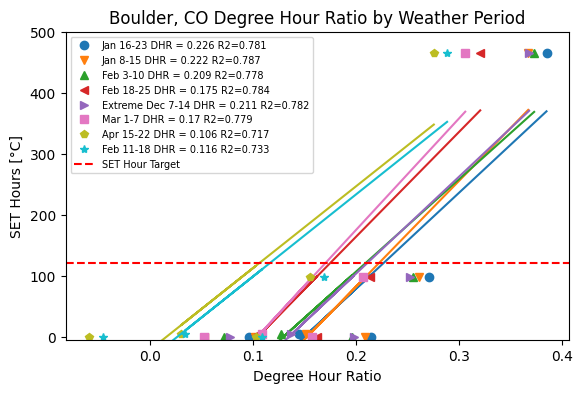

In [8]:
data_file = "D:/School/IIT-PHD/FIeld Study/Parametrics/boulder2/master_results.csv"

df = pd.read_csv(data_file)

climates = ['Jan 16-23', 'Jan 8-15', 'Feb 3-10', 'Feb 18-25', 'Extreme Dec 7-14', 'Mar 1-7', 'Apr 15-22', 'Feb 11-18']

print(climates)

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:pink', 'tab:olive', 'tab:cyan']
markers = ['o', 'v', '^', '<', '>', 's', 'p', '*']


count = 0

dhr_boulder = []
avg_t_boulder = []

fig = plt.figure()
fig.set_size_inches(6.5, 4)

for climate in climates:


    row = df[df['Climate'] == str(climate)]

    gr_24 = row['24 hr Ratio']
    gr_48 = row['48 hr Ratio']
    gr_168 = row['168 hr Ratio']
    set_hours = row['SET Hours']

    avg_t_climate = list(row['24 Avg ODB'])[0]
    # print(avg_t_climate)
    avg_t_boulder.append(avg_t_climate)

    
    m_24, b_24 = np.polyfit(gr_24, set_hours, 1)
    ratio_target = round((120 -b_24)/m_24, 3)
    R = np.corrcoef(gr_24, set_hours)[0,1]
    R_Squared_24 = round(R*R,3)
    plt.plot(gr_24, set_hours, 'o', color=colors[count], marker=markers[count], label=(str(climate)+ 
            " DHR = " + str(ratio_target) + ' R2=' + str(R_Squared_24)))
    plt.plot(gr_24, m_24*gr_24+b_24, color=colors[count],)

    dhr_boulder.append(ratio_target)

    

    # plt.plot(gr_48, set_hours, 'o', color='orange')
    # m_48, b_48 = np.polyfit(gr_48, set_hours, 1)
    # plt.plot(gr_48, m_48*gr_48+b_48, color='orange')

    # R = np.corrcoef(gr_48, set_hours)[0,1]
    # R_Squared_48 = R*R

    # plt.plot(gr_168, set_hours, 'o', color='green')
    # m_168, b_168 = np.polyfit(gr_168, set_hours, 1)
    # plt.plot(gr_168, m_168*gr_168+b_168, color='green')

    # R = np.corrcoef(gr_168, set_hours)[0,1]
    # R_Squared_168 = R*R

    print(R_Squared_24)
    # print(R_Squared_48)
    # print(R_Squared_168)

    count = count + 1



plt.axhline(y=120, color='r', linestyle='--', label='SET Hour Target')
plt.legend(fontsize=7)
plt.title('Boulder, CO Degree Hour Ratio by Weather Period')
plt.xlabel('Degree Hour Ratio')
plt.ylabel('SET Hours [°C]')
plt.ylim(-5,500)



['Jan 16-23', 'Jan 8-15', 'Feb 3-10', 'Feb 18-25', 'Extreme Dec 22-28', 'Mar 1-7', 'Apr 15-22', 'Feb 11-18']
0.825
0.828
0.83
0.827
0.839
0.833
0.804
0.826


C:\Users\amitc_crl\AppData\Local\Temp\ipykernel_26664\1250251924.py:40: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(gr_24, set_hours, 'o', color=colors[count], marker=markers[count], label=(str(climate)+


(-5.0, 800.0)

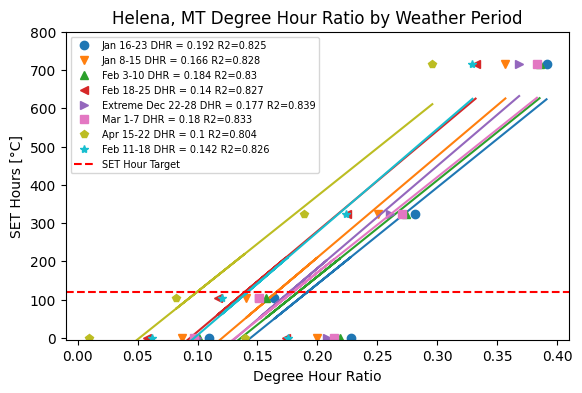

In [21]:
data_file = "D:/School/IIT-PHD/FIeld Study/Parametrics/helena/master_results_helena.csv"

df = pd.read_csv(data_file)

climates = ['Jan 16-23', 'Jan 8-15', 'Feb 3-10', 'Feb 18-25', 'Extreme Dec 22-28', 'Mar 1-7', 'Apr 15-22', 'Feb 11-18']

print(climates)

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:pink', 'tab:olive', 'tab:cyan']
markers = ['o', 'v', '^', '<', '>', 's', 'p', '*']


count = 0

dhr_helena = []
avg_t_helena = []

fig = plt.figure()
fig.set_size_inches(6.5, 4)

for climate in climates:


    row = df[df['Climate'] == str(climate)]

    gr_24 = row['24 hr Ratio']
    gr_48 = row['48 hr Ratio']
    gr_168 = row['168 hr Ratio']
    set_hours = row['SET Hours']

    avg_t_climate = list(row['24 Avg ODB'])[0]
    # print(avg_t_climate)
    avg_t_helena.append(avg_t_climate)

    
    m_24, b_24 = np.polyfit(gr_24, set_hours, 1)
    ratio_target = round((120 -b_24)/m_24, 3)
    R = np.corrcoef(gr_24, set_hours)[0,1]
    R_Squared_24 = round(R*R,3)
    plt.plot(gr_24, set_hours, 'o', color=colors[count], marker=markers[count], label=(str(climate)+ 
            " DHR = " + str(ratio_target) + ' R2=' + str(R_Squared_24)))
    plt.plot(gr_24, m_24*gr_24+b_24, color=colors[count],)

    dhr_helena.append(ratio_target)

    

    # plt.plot(gr_48, set_hours, 'o', color='orange')
    # m_48, b_48 = np.polyfit(gr_48, set_hours, 1)
    # plt.plot(gr_48, m_48*gr_48+b_48, color='orange')

    # R = np.corrcoef(gr_48, set_hours)[0,1]
    # R_Squared_48 = R*R

    # plt.plot(gr_168, set_hours, 'o', color='green')
    # m_168, b_168 = np.polyfit(gr_168, set_hours, 1)
    # plt.plot(gr_168, m_168*gr_168+b_168, color='green')

    # R = np.corrcoef(gr_168, set_hours)[0,1]
    # R_Squared_168 = R*R

    print(R_Squared_24)
    # print(R_Squared_48)
    # print(R_Squared_168)

    count = count + 1



plt.axhline(y=120, color='r', linestyle='--', label='SET Hour Target')
plt.legend(fontsize=7)
plt.title('Helena, MT Degree Hour Ratio by Weather Period')
plt.xlabel('Degree Hour Ratio')
plt.ylabel('SET Hours [°C]')
plt.ylim(-5,800)



['Jan 16-23', 'Jan 8-15', 'Feb 3-10', 'Feb 18-25', 'Extreme Dec 7-14', 'Mar 1-7', 'Feb 11-18']
0.773
0.782
0.78
0.78
0.768
0.774
0.774


C:\Users\amitc_crl\AppData\Local\Temp\ipykernel_26664\1405737980.py:41: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(gr_24, set_hours, 'o', color=colors[count], marker=markers[count], label=(str(climate)+


(-5.0, 3200.0)

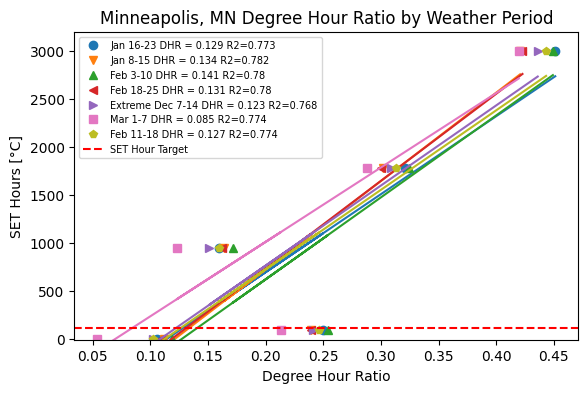

In [22]:
data_file = "D:/School/IIT-PHD/FIeld Study/Parametrics/minneapolis/master_results_minneapolis.csv"

df = pd.read_csv(data_file)

climates = ['Jan 16-23', 'Jan 8-15', 'Feb 3-10', 'Feb 18-25', 'Extreme Dec 7-14', 'Mar 1-7', 'Feb 11-18']
# climates = ['Jan 16-23', 'Jan 8-15', 'Feb 3-10', 'Feb 18-25', 'Extreme Dec 7-14', 'Mar 1-7', 'Apr 15-22', 'Feb 11-18']

print(climates)

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:pink', 'tab:olive', 'tab:cyan']
markers = ['o', 'v', '^', '<', '>', 's', 'p', '*']


count = 0

dhr_minneapolis = []
avg_t_minneapolis = []

fig = plt.figure()
fig.set_size_inches(6.5, 4)

for climate in climates:


    row = df[df['Climate'] == str(climate)]

    gr_24 = row['24 hr Ratio']
    gr_48 = row['48 hr Ratio']
    gr_168 = row['168 hr Ratio']
    set_hours = row['SET Hours']

    avg_t_climate = list(row['24 Avg ODB'])[0]
    # print(avg_t_climate)
    avg_t_minneapolis.append(avg_t_climate)

    
    m_24, b_24 = np.polyfit(gr_24, set_hours, 1)
    ratio_target = round((120 -b_24)/m_24, 3)
    R = np.corrcoef(gr_24, set_hours)[0,1]
    R_Squared_24 = round(R*R,3)
    plt.plot(gr_24, set_hours, 'o', color=colors[count], marker=markers[count], label=(str(climate)+ 
            " DHR = " + str(ratio_target) + ' R2=' + str(R_Squared_24)))
    plt.plot(gr_24, m_24*gr_24+b_24, color=colors[count],)

    dhr_minneapolis.append(ratio_target)

    

    # plt.plot(gr_48, set_hours, 'o', color='orange')
    # m_48, b_48 = np.polyfit(gr_48, set_hours, 1)
    # plt.plot(gr_48, m_48*gr_48+b_48, color='orange')

    # R = np.corrcoef(gr_48, set_hours)[0,1]
    # R_Squared_48 = R*R

    # plt.plot(gr_168, set_hours, 'o', color='green')
    # m_168, b_168 = np.polyfit(gr_168, set_hours, 1)
    # plt.plot(gr_168, m_168*gr_168+b_168, color='green')

    # R = np.corrcoef(gr_168, set_hours)[0,1]
    # R_Squared_168 = R*R

    print(R_Squared_24)
    # print(R_Squared_48)
    # print(R_Squared_168)

    count = count + 1



plt.axhline(y=120, color='r', linestyle='--', label='SET Hour Target')
plt.legend(fontsize=7)
plt.title('Minneapolis, MN Degree Hour Ratio by Weather Period')
plt.xlabel('Degree Hour Ratio')
plt.ylabel('SET Hours [°C]')
plt.ylim(-5,3200)



['Jan 16-23', 'Jan 8-15', 'Feb 3-10', 'Feb 18-25', 'Extreme Dec 19-26', 'Mar 1-7', 'Feb 11-18']
0.825
0.79
0.814
0.815
0.798
0.805
0.818


C:\Users\amitc_crl\AppData\Local\Temp\ipykernel_26664\788287092.py:41: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(gr_24, set_hours, 'o', color=colors[count], marker=markers[count], label=(str(climate)+


(-5.0, 1500.0)

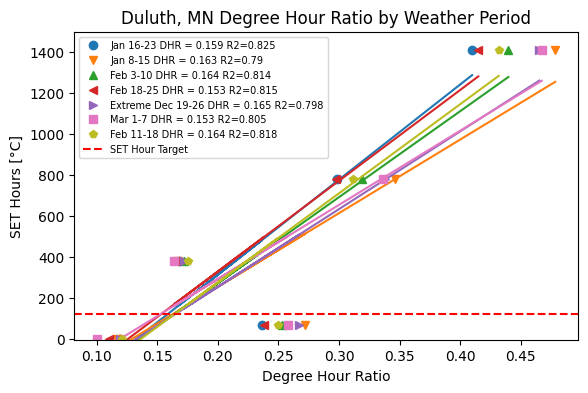

In [29]:
data_file = "D:/School/IIT-PHD/FIeld Study/Parametrics/duluth/master_results_duluth.csv"

df = pd.read_csv(data_file)

climates = ['Jan 16-23', 'Jan 8-15', 'Feb 3-10', 'Feb 18-25', 'Extreme Dec 19-26', 'Mar 1-7', 'Feb 11-18']
# climates = ['Jan 16-23', 'Jan 8-15', 'Feb 3-10', 'Feb 18-25', 'Extreme Dec 19-26', 'Mar 1-7', 'Apr 15-22', 'Feb 11-18']

print(climates)

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:pink', 'tab:olive', 'tab:cyan']
markers = ['o', 'v', '^', '<', '>', 's', 'p', '*']


count = 0

dhr_duluth = []
avg_t_duluth = []

fig = plt.figure()
fig.set_size_inches(6.5, 4)

for climate in climates:


    row = df[df['Climate'] == str(climate)]

    gr_24 = row['24 hr Ratio']
    gr_48 = row['48 hr Ratio']
    gr_168 = row['168 hr Ratio']
    set_hours = row['SET Hours']

    avg_t_climate = list(row['24 Avg ODB'])[0]
    # print(avg_t_climate)
    avg_t_duluth.append(avg_t_climate)

    
    m_24, b_24 = np.polyfit(gr_24, set_hours, 1)
    ratio_target = round((120 -b_24)/m_24, 3)
    R = np.corrcoef(gr_24, set_hours)[0,1]
    R_Squared_24 = round(R*R,3)
    plt.plot(gr_24, set_hours, 'o', color=colors[count], marker=markers[count], label=(str(climate)+ 
            " DHR = " + str(ratio_target) + ' R2=' + str(R_Squared_24)))
    plt.plot(gr_24, m_24*gr_24+b_24, color=colors[count],)

    dhr_duluth.append(ratio_target)

    

    # plt.plot(gr_48, set_hours, 'o', color='orange')
    # m_48, b_48 = np.polyfit(gr_48, set_hours, 1)
    # plt.plot(gr_48, m_48*gr_48+b_48, color='orange')

    # R = np.corrcoef(gr_48, set_hours)[0,1]
    # R_Squared_48 = R*R

    # plt.plot(gr_168, set_hours, 'o', color='green')
    # m_168, b_168 = np.polyfit(gr_168, set_hours, 1)
    # plt.plot(gr_168, m_168*gr_168+b_168, color='green')

    # R = np.corrcoef(gr_168, set_hours)[0,1]
    # R_Squared_168 = R*R

    print(R_Squared_24)
    # print(R_Squared_48)
    # print(R_Squared_168)

    count = count + 1



plt.axhline(y=120, color='r', linestyle='--', label='SET Hour Target')
plt.legend(fontsize=7)
plt.title('Duluth, MN Degree Hour Ratio by Weather Period')
plt.xlabel('Degree Hour Ratio')
plt.ylabel('SET Hours [°C]')
plt.ylim(-5,1500)



Coefficients = [-5.10752059e-03 -1.29669511e-05]
Intercept = 0.1745547888221503
mean_squared_error :  0.005307868268374231
mean_absolute_error :  0.04489891382025386


Text(0.5, 0, 'Degree Hour Ratio')

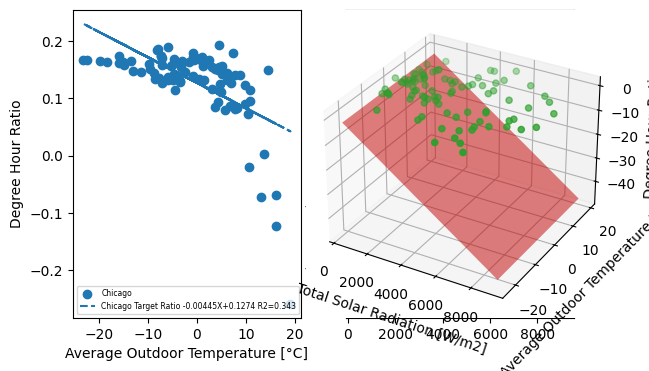

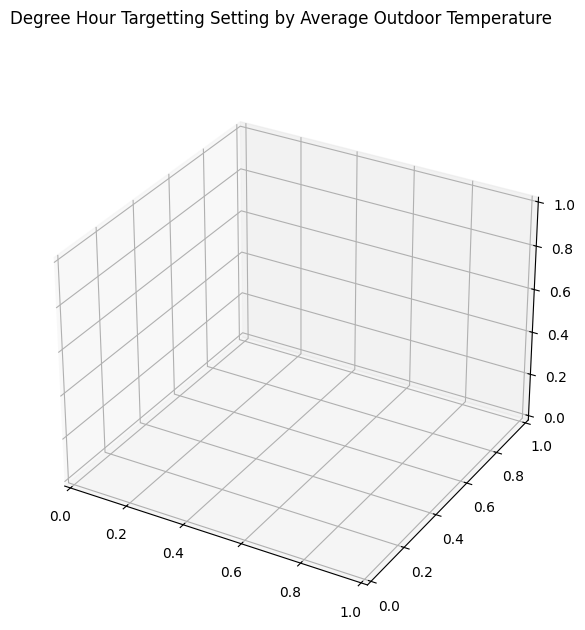

In [53]:
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:pink', 'tab:olive', 'tab:cyan']
markers = ['o', 'v', '^', '<', '>', 's', 'p', '*']


count = 0


fig,axs = plt.subplots(1,3)
fig.set_size_inches(10, 4)
axs[2].remove()
axs[2] = fig.add_subplot(1,1,1, projection='3d')

axs[0].scatter(avg_t_chi, dhr_chi, label='Chicago', color='tab:blue', marker=markers[0])
axs[1].scatter(solar_rad_chi, dhr_chi, label='Chicago', color='tab:orange', marker=markers[0])
axs[2].scatter(solar_rad_chi, avg_t_chi, dhr_chi, label='Chicago', color='tab:green', marker=markers[0])
# axs[0].scatter(avg_t_boulder, dhr_boulder, label='Boulder', color='tab:orange', marker=markers[1])
# axs[0].scatter(avg_t_helena, dhr_helena, label='Helena', color='tab:green', marker=markers[2])
# axs[0].scatter(avg_t_minneapolis, dhr_minneapolis, label='Minneapolis', color='tab:red', marker=markers[3])
# axs[0].scatter(avg_t_duluth, dhr_duluth, label='Duluth', color='tab:purple', marker=markers[4])

m, b = np.polyfit(avg_t_chi, dhr_chi, 1)
R = np.corrcoef(avg_t_chi, dhr_chi)[0,1]
R_Squared = R*R
axs[0].plot(np.asarray(avg_t_chi), m*np.asarray(avg_t_chi)+b, color='tab:blue', linestyle='--', 
         label=('Chicago Target Ratio ' + str(round(m,5)) + 'X+' +str(round(b,4)) + ' R2=' + str(round(R_Squared,3))))
# print(R_Squared)

m, b = np.polyfit(solar_rad_chi, dhr_chi, 1)
R = np.corrcoef(solar_rad_chi, dhr_chi)[0,1]
R_Squared = R*R
axs[1].plot(np.asarray(solar_rad_chi), m*np.asarray(solar_rad_chi)+b, color='tab:orange', linestyle='--', 
         label=('Chicago Target Ratio 2' + str(round(m,5)) + 'X+' +str(round(b,4)) + ' R2=' + str(round(R_Squared,3))))
# print(R_Squared)

X = []
for step in range(len(avg_t_chi)):
    X.append([avg_t_chi[step],solar_rad_chi[step]])

# X = [avg_t_chi, solar_rad_chi]
# print(X)

y = dhr_chi
# print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)
model.fit(X, y)
predictions = model.predict(X_test)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')


x1_range = np.linspace(min(solar_rad_chi), max(solar_rad_chi), 100)
x2_range = np.linspace(min(avg_t_chi), max(avg_t_chi), 100)
x1, x2 = np.meshgrid(x1_range, x2_range)

z = model.predict(np.c_[x1.ravel(), x2.ravel()]).reshape(x1.shape)

axs[2].plot_surface(x1, x2, z, color='red', alpha=0.5, rstride=100, cstride=100)




print("Coefficients = " +str(model.coef_))
print("Intercept = " + str(model.intercept_))
print('mean_squared_error : ', mean_squared_error(y_test, predictions))
print('mean_absolute_error : ', mean_absolute_error(y_test, predictions))





# m, b = np.polyfit(avg_t_boulder, dhr_boulder, 1)
# R = np.corrcoef(avg_t_boulder, dhr_boulder)[0,1]
# R_Squared = R*R
# axs[0].plot(np.asarray(avg_t_boulder), m*np.asarray(avg_t_boulder)+b, color='tab:orange', linestyle='--', 
#          label=('Boulder Target Ratio ' + str(round(m,5)) + 'X+' +str(round(b,4)) + ' R2=' + str(round(R_Squared,3))))
# print(R_Squared)

# m, b = np.polyfit(avg_t_helena, dhr_helena, 1)
# R = np.corrcoef(avg_t_helena, dhr_helena)[0,1]
# R_Squared = R*R
# axs[0].plot(np.asarray(avg_t_helena), m*np.asarray(avg_t_helena)+b, color='tab:green', linestyle='--', 
#          label=('Helena Target Ratio ' + str(round(m,5)) + 'X+' +str(round(b,4)) + ' R2=' + str(round(R_Squared,3))))
# print(R_Squared)

# m, b = np.polyfit(avg_t_minneapolis, dhr_minneapolis, 1)
# R = np.corrcoef(avg_t_minneapolis, dhr_minneapolis)[0,1]
# R_Squared = R*R
# axs[0].plot(np.asarray(avg_t_minneapolis), m*np.asarray(avg_t_minneapolis)+b, color='tab:red', linestyle='--', 
#          label=('Minneapolis Target Ratio ' + str(round(m,5)) + 'X+' +str(round(b,4)) + ' R2=' + str(round(R_Squared,3))))
# print(R_Squared)

# m, b = np.polyfit(avg_t_duluth, dhr_duluth, 1)
# R = np.corrcoef(avg_t_duluth, dhr_duluth)[0,1]
# R_Squared = R*R
# axs[0].plot(np.asarray(avg_t_duluth), m*np.asarray(avg_t_duluth)+b, color='tab:purple', linestyle='--', 
#          label=('Duluth Target Ratio ' + str(round(m,5)) + 'X+' +str(round(b,4)) + ' R2=' + str(round(R_Squared,3))))
# print(R_Squared)


# axs[0].axhline(y=216, color='r', linestyle='--', label='SET Hour Target')
axs[0].legend(fontsize=5.5)
axs[1].legend(fontsize=5.5)
fig.suptitle('Degree Hour Targetting Setting by Average Outdoor Temperature')
axs[0].set_xlabel('Average Outdoor Temperature [°C]')
axs[0].set_ylabel('Degree Hour Ratio')

axs[2].set_xlabel('Total Solar Radiation [W/m2]')
axs[2].set_ylabel('Average Outdoor Temperature [°C]')
axs[2].set_zlabel('Degree Hour Ratio')



In [24]:
df = pd.read_csv("C:/Users/amitc_crl/Downloads/Real-estate1.csv")
df.drop('No', inplace=True, axis=1)

print(df.head())

print(df.columns)


# creating feature variables
X = df.drop('Y house price of unit area', axis=1)
y = df['Y house price of unit area']

print(X)
print(y)

# creating train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=101)

# creating a regression model
model = LinearRegression()

# fitting the model
model.fit(X_train, y_train)

# making predictions
predictions = model.predict(X_test)

# model evaluation
print('mean_squared_error : ', mean_squared_error(y_test, predictions))
print('mean_absolute_error : ', mean_absolute_error(y_test, predictions))

   X1 transaction date  X2 house age  X3 distance to the nearest MRT station  \
0             2012.917          32.0                                84.87882   
1             2012.917          19.5                               306.59470   
2             2013.583          13.3                               561.98450   
3             2013.500          13.3                               561.98450   
4             2012.833           5.0                               390.56840   

   X4 number of convenience stores  X5 latitude  X6 longitude  \
0                               10     24.98298     121.54024   
1                                9     24.98034     121.53951   
2                                5     24.98746     121.54391   
3                                5     24.98746     121.54391   
4                                5     24.97937     121.54245   

   Y house price of unit area  
0                        37.9  
1                        42.2  
2                        47.3  


c:\Users\amitc_crl\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\Users\amitc_crl\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
c:\Users\amitc_crl\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\amitc_crl\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\amitc_crl\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2704: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


TypeError: expected non-empty vector for x

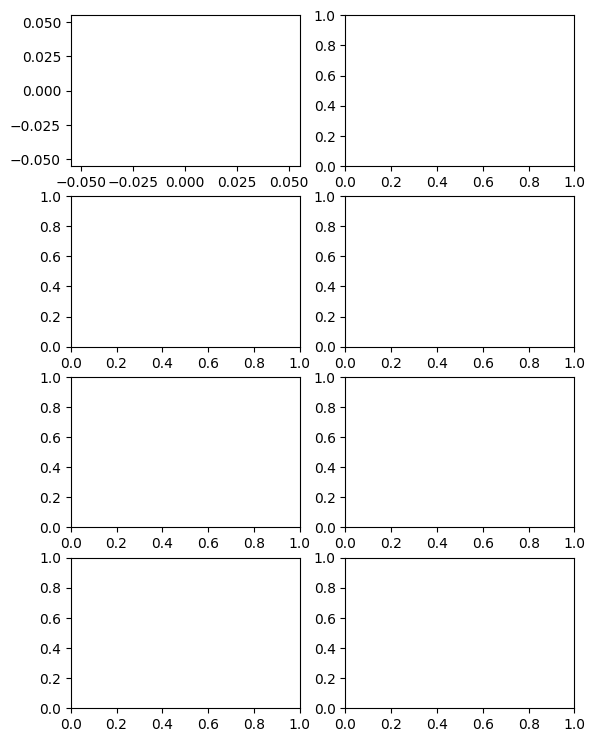

In [32]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(6.5, 9))

df = pd.read_csv(data_file)



# AlbuquerqueNM
row = df[df['Climate'] == 'Extreme']

gr_24 = row['24 hr Ratio']
gr_48 = row['48 hr Ratio']
gr_168 = row['168 hr Ratio']
set_hours = row['SET Hours']

R = np.corrcoef(gr_24, set_hours)[0,1]
R_Squared_24 = R*R

axs[0,0].plot(gr_24, set_hours, 'o', color='blue')
m_24, b_24 = np.polyfit(gr_24, set_hours, 1)
axs[0,0].plot(gr_24, m_24*gr_24+b_24, color='blue', label=('24 hr R2=' + str(round(R_Squared_24,3))))

ratio_alb = round(((216 - b_24) / m_24), 3)

R = np.corrcoef(gr_48, set_hours)[0,1]
R_Squared_48 = R*R

axs[0,0].plot(gr_48, set_hours, 'o', color='orange')
m_48, b_48 = np.polyfit(gr_48, set_hours, 1)
axs[0,0].plot(gr_48, m_48*gr_48+b_48, color='orange', label=('48 hr R2=' + str(round(R_Squared_48,3))))

R = np.corrcoef(gr_168, set_hours)[0,1]
R_Squared_168 = R*R

axs[0,0].plot(gr_168, set_hours, 'o', color='green')
m_168, b_168 = np.polyfit(gr_168, set_hours, 1)
axs[0,0].plot(gr_168, m_168*gr_168+b_168, color='green', label=('168 hr R2=' + str(round(R_Squared_168,3))))

axs[0,0].axhline(y=216, color='r', linestyle='--')
axs[0,0].set_xlim(0, 1)
# axs[0,0].set_xlabel('Degree Hour Ratio [°F Hr]')
axs[0,0].set_ylabel('SET Hours [°F Hr]')
axs[0,0].legend(loc='best', fontsize=6)
axs[0,0].set_title('Extreme\n Ratio = ' + str(ratio_alb), fontsize=8)

# ChicagoIL

row = df[df['Climate'] == 'Janurary3']

gr_24 = row['24 hr Ratio']
gr_48 = row['48 hr Ratio']
gr_168 = row['168 hr Ratio']
set_hours = row['SET Hours']

R = np.corrcoef(gr_24, set_hours)[0,1]
R_Squared_24 = R*R

axs[0,1].plot(gr_24, set_hours, 'o', color='blue')
m_24, b_24 = np.polyfit(gr_24, set_hours, 1)
axs[0,1].plot(gr_24, m_24*gr_24+b_24, color='blue', label=('24 hr R2=' + str(round(R_Squared_24,3))))

ratio_chi = round(((216 - b_24) / m_24), 3)

R = np.corrcoef(gr_48, set_hours)[0,1]
R_Squared_48 = R*R

axs[0,1].plot(gr_48, set_hours, 'o', color='orange')
m_48, b_48 = np.polyfit(gr_48, set_hours, 1)
axs[0,1].plot(gr_48, m_48*gr_48+b_48, color='orange', label=('48 hr R2=' + str(round(R_Squared_48,3))))

R = np.corrcoef(gr_168, set_hours)[0,1]
R_Squared_168 = R*R

axs[0,1].plot(gr_168, set_hours, 'o', color='green')
m_168, b_168 = np.polyfit(gr_168, set_hours, 1)
axs[0,1].plot(gr_168, m_168*gr_168+b_168, color='green', label=('168 hr R2=' + str(round(R_Squared_168,3))))

axs[0,1].axhline(y=216, color='r', linestyle='--')
axs[0,1].set_xlim(0, 1)
# axs[0,1].set_xlabel('Degree Hour Ratio [°F Hr]')
# axs[0,1].set_ylabel('SET Hours [°F Hr]')
axs[0,1].legend(loc='best', fontsize=6)
axs[0,1].set_title('Janurary3\n Ratio = ' + str(ratio_chi), fontsize=8)

# ElPasoTX

row = df[df['Climate'] == 'Feburary1']

gr_24 = row['24 hr Ratio']
gr_48 = row['48 hr Ratio']
gr_168 = row['168 hr Ratio']
set_hours = row['SET Hours']

R = np.corrcoef(gr_24, set_hours)[0,1]
R_Squared_24 = R*R

axs[1,0].plot(gr_24, set_hours, 'o', color='blue')
m_24, b_24 = np.polyfit(gr_24, set_hours, 1)
axs[1,0].plot(gr_24, m_24*gr_24+b_24, color='blue', label=('24 hr R2=' + str(round(R_Squared_24,3))))

ratio_ep = round(((216 - b_24) / m_24), 3)

R = np.corrcoef(gr_48, set_hours)[0,1]
R_Squared_48 = R*R

axs[1,0].plot(gr_48, set_hours, 'o', color='orange')
m_48, b_48 = np.polyfit(gr_48, set_hours, 1)
axs[1,0].plot(gr_48, m_48*gr_48+b_48, color='orange', label=('48 hr R2=' + str(round(R_Squared_48,3))))

R = np.corrcoef(gr_168, set_hours)[0,1]
R_Squared_168 = R*R

axs[1,0].plot(gr_168, set_hours, 'o', color='green')
m_168, b_168 = np.polyfit(gr_168, set_hours, 1)
axs[1,0].plot(gr_168, m_168*gr_168+b_168, color='green', label=('168 hr R2=' + str(round(R_Squared_168,3))))

axs[1,0].axhline(y=216, color='r', linestyle='--')
axs[1,0].set_xlim(0, 1)
# axs[1,0].set_xlabel('Degree Hour Ratio [°F Hr]')
axs[1,0].set_ylabel('SET Hours [°F Hr]')
axs[1,0].legend(loc='best', fontsize=6)
axs[1,0].set_title('Feburary1\n Ratio = ' + str(ratio_ep), fontsize=8)


# GreatFallsMT

row = df[df['Climate'] == 'Feburary']

gr_24 = row['24 hr Ratio']
gr_48 = row['48 hr Ratio']
gr_168 = row['168 hr Ratio']
set_hours = row['SET Hours']

R = np.corrcoef(gr_24, set_hours)[0,1]
R_Squared_24 = R*R
print(gr_24)

axs[1,1].plot(gr_24, set_hours, 'o', color='blue')
m_24, b_24 = np.polyfit(gr_24, set_hours, 1)
axs[1,1].plot(gr_24, m_24*gr_24+b_24, color='blue', label=('24 hr R2=' + str(round(R_Squared_24,3))))

ratio_gf = round(((216 - b_24) / m_24), 3)

R = np.corrcoef(gr_48, set_hours)[0,1]
R_Squared_48 = R*R

axs[1,1].plot(gr_48, set_hours, 'o', color='orange')
m_48, b_48 = np.polyfit(gr_48, set_hours, 1)
axs[1,1].plot(gr_48, m_48*gr_48+b_48, color='orange', label=('48 hr R2=' + str(round(R_Squared_48,3))))

R = np.corrcoef(gr_168, set_hours)[0,1]
R_Squared_168 = R*R

axs[1,1].plot(gr_168, set_hours, 'o', color='green')
m_168, b_168 = np.polyfit(gr_168, set_hours, 1)
axs[1,1].plot(gr_168, m_168*gr_168+b_168, color='green', label=('168 hr R2=' + str(round(R_Squared_168,3))))

axs[1,1].axhline(y=216, color='r', linestyle='--')
axs[1,1].set_xlim(0, 1)
# axs[1,1].set_xlabel('Degree Hour Ratio [°F Hr]')
# axs[1,1].set_ylabel('SET Hours [°F Hr]')
axs[1,1].legend(loc='best', fontsize=6)
axs[1,1].set_title('Feburary\n Ratio = ' + str(ratio_gf), fontsize=8)

# InternationalFallsMN

row = df[df['Climate'] == 'March']

gr_24 = row['24 hr Ratio']
gr_48 = row['48 hr Ratio']
gr_168 = row['168 hr Ratio']
set_hours = row['SET Hours']

R = np.corrcoef(gr_24, set_hours)[0,1]
R_Squared_24 = R*R

axs[2,0].plot(gr_24, set_hours, 'o', color='blue')
m_24, b_24 = np.polyfit(gr_24, set_hours, 1)
axs[2,0].plot(gr_24, m_24*gr_24+b_24, color='blue', label=('24 hr R2=' + str(round(R_Squared_24,3))))

ratio_if = round(((216 - b_24) / m_24), 3)

R = np.corrcoef(gr_48, set_hours)[0,1]
R_Squared_48 = R*R

axs[2,0].plot(gr_48, set_hours, 'o', color='orange')
m_48, b_48 = np.polyfit(gr_48, set_hours, 1)
axs[2,0].plot(gr_48, m_48*gr_48+b_48, color='orange', label=('48 hr R2=' + str(round(R_Squared_48,3))))

R = np.corrcoef(gr_168, set_hours)[0,1]
R_Squared_168 = R*R

axs[2,0].plot(gr_168, set_hours, 'o', color='green')
m_168, b_168 = np.polyfit(gr_168, set_hours, 1)
axs[2,0].plot(gr_168, m_168*gr_168+b_168, color='green', label=('168 hr R2=' + str(round(R_Squared_168,3))))

axs[2,0].axhline(y=216, color='r', linestyle='--')
axs[2,0].set_xlim(0, 1)
# axs[2,0].set_xlabel('Degree Hour Ratio [°F Hr]')
axs[2,0].set_ylabel('SET Hours [°F Hr]')
axs[2,0].legend(loc='best', fontsize=6)
axs[2,0].set_title('March\n Ratio = ' + str(ratio_if), fontsize=8)

# NashvilleTN

row = df[df['Climate'] == 'Janurary2']

gr_24 = row['24 hr Ratio']
gr_48 = row['48 hr Ratio']
gr_168 = row['168 hr Ratio']
set_hours = row['SET Hours']

R = np.corrcoef(gr_24, set_hours)[0,1]
R_Squared_24 = R*R

axs[2,1].plot(gr_24, set_hours, 'o', color='blue')
m_24, b_24 = np.polyfit(gr_24, set_hours, 1)
axs[2,1].plot(gr_24, m_24*gr_24+b_24, color='blue', label=('24 hr R2=' + str(round(R_Squared_24,3))))

ratio_nash = round(((216 - b_24) / m_24), 3)

R = np.corrcoef(gr_48, set_hours)[0,1]
R_Squared_48 = R*R

axs[2,1].plot(gr_48, set_hours, 'o', color='orange')
m_48, b_48 = np.polyfit(gr_48, set_hours, 1)
axs[2,1].plot(gr_48, m_48*gr_48+b_48, color='orange', label=('48 hr R2=' + str(round(R_Squared_48,3))))

R = np.corrcoef(gr_168, set_hours)[0,1]
R_Squared_168 = R*R

axs[2,1].plot(gr_168, set_hours, 'o', color='green')
m_168, b_168 = np.polyfit(gr_168, set_hours, 1)
axs[2,1].plot(gr_168, m_168*gr_168+b_168, color='green', label=('168 hr R2=' + str(round(R_Squared_168,3))))

axs[2,1].axhline(y=216, color='r', linestyle='--')
axs[2,1].set_xlim(0, 1)
# axs[2,1].set_xlabel('Degree Hour Ratio [°F Hr]')
# axs[2,1].set_ylabel('SET Hours [°F Hr]')
axs[2,1].legend(loc='best', fontsize=6)
axs[2,1].set_title('Janurary2\n Ratio = ' + str(ratio_nash), fontsize=8)

# TampaFL

row = df[df['Climate'] == 'Feburary2']

gr_24 = row['24 hr Ratio']
gr_48 = row['48 hr Ratio']
gr_168 = row['168 hr Ratio']
set_hours = row['SET Hours']

R = np.corrcoef(gr_24, set_hours)[0,1]
R_Squared_24 = R*R

axs[3,0].plot(gr_24, set_hours, 'o', color='blue')
m_24, b_24 = np.polyfit(gr_24, set_hours, 1)
axs[3,0].plot(gr_24, m_24*gr_24+b_24, color='blue', label=('24 hr R2=' + str(round(R_Squared_24,3))))

ratio_tf = round(((216 - b_24) / m_24), 3)

R = np.corrcoef(gr_48, set_hours)[0,1]
R_Squared_48 = R*R

axs[3,0].plot(gr_48, set_hours, 'o', color='orange')
m_48, b_48 = np.polyfit(gr_48, set_hours, 1)
axs[3,0].plot(gr_48, m_48*gr_48+b_48, color='orange', label=('48 hr R2=' + str(round(R_Squared_48,3))))

R = np.corrcoef(gr_168, set_hours)[0,1]
R_Squared_168 = R*R

axs[3,0].plot(gr_168, set_hours, 'o', color='green')
m_168, b_168 = np.polyfit(gr_168, set_hours, 1)
axs[3,0].plot(gr_168, m_168*gr_168+b_168, color='green', label=('168 hr R2=' + str(round(R_Squared_168,3))))

axs[3,0].axhline(y=216, color='r', linestyle='--')
axs[3,0].set_xlim(0, 1)
axs[3,0].set_xlabel('Degree Hour Ratio [°F Hr]')
axs[3,0].set_ylabel('SET Hours [°F Hr]')
axs[3,0].legend(loc='best', fontsize=6)
axs[3,0].set_title('Feburary2\n Ratio = ' + str(ratio_tf), fontsize=8)


# VancouverBC

row = df[df['Climate'] == 'April']

gr_24 = row['24 hr Ratio']
gr_48 = row['48 hr Ratio']
gr_168 = row['168 hr Ratio']
set_hours = row['SET Hours']

R = np.corrcoef(gr_24, set_hours)[0,1]
R_Squared_24 = R*R

axs[3,1].plot(gr_24, set_hours, 'o', color='blue')
m_24, b_24 = np.polyfit(gr_24, set_hours, 1)
axs[3,1].plot(gr_24, m_24*gr_24+b_24, color='blue', label=('24 hr R2=' + str(round(R_Squared_24,3))))

ratio_van = round(((216 - b_24) / m_24), 3)

R = np.corrcoef(gr_48, set_hours)[0,1]
R_Squared_48 = R*R

axs[3,1].plot(gr_48, set_hours, 'o', color='orange')
m_48, b_48 = np.polyfit(gr_48, set_hours, 1)
axs[3,1].plot(gr_48, m_48*gr_48+b_48, color='orange', label=('48 hr R2=' + str(round(R_Squared_48,3))))

R = np.corrcoef(gr_168, set_hours)[0,1]
R_Squared_168 = R*R

axs[3,1].plot(gr_168, set_hours, 'o', color='green')
m_168, b_168 = np.polyfit(gr_168, set_hours, 1)
axs[3,1].plot(gr_168, m_168*gr_168+b_168, color='green', label=('168 hr R2=' + str(round(R_Squared_168,3))))

axs[3,1].axhline(y=216, color='r', linestyle='--')
axs[3,1].set_xlim(0, 1)
axs[3,1].set_xlabel('Degree Hour Ratio [°F Hr]')
# axs[3,1].set_ylabel('SET Hours [°F Hr]')
axs[3,1].legend(loc='best', fontsize=6)
axs[3,1].set_title('April\n Ratio = ' + str(ratio_van), fontsize=8)



fig.tight_layout(pad=3)
fig.suptitle('Correlation of Degree Hours and SET Hours')






plt.show()

KeyError: 'SET Hours'

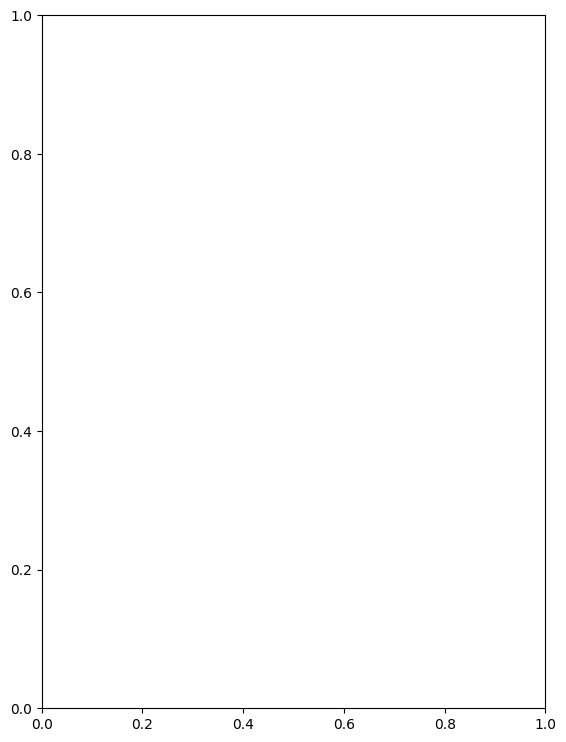

In [4]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(6.5, 9))

df = pd.read_csv(data_file)



# AlbuquerqueNM
row = df[df['Climate'] == 'Extreme']

gr_24 = row['24 hr Ratio']
gr_48 = row['48 hr Ratio']
gr_168 = row['168 hr Ratio']
set_hours = row['SET Hours']

R = np.corrcoef(gr_24, set_hours)[0,1]
R_Squared_24 = R*R

axs[0,0].plot(gr_24, set_hours, 'o', color='blue')
m_24, b_24 = np.polyfit(gr_24, set_hours, 1)
axs[0,0].plot(gr_24, m_24*gr_24+b_24, color='blue', label=('24 hr R2=' + str(round(R_Squared_24,3))))

ratio_alb = round(((216 - b_24) / m_24), 3)

R = np.corrcoef(gr_48, set_hours)[0,1]
R_Squared_48 = R*R

axs[0,0].plot(gr_48, set_hours, 'o', color='orange')
m_48, b_48 = np.polyfit(gr_48, set_hours, 1)
axs[0,0].plot(gr_48, m_48*gr_48+b_48, color='orange', label=('48 hr R2=' + str(round(R_Squared_48,3))))

R = np.corrcoef(gr_168, set_hours)[0,1]
R_Squared_168 = R*R

axs[0,0].plot(gr_168, set_hours, 'o', color='green')
m_168, b_168 = np.polyfit(gr_168, set_hours, 1)
axs[0,0].plot(gr_168, m_168*gr_168+b_168, color='green', label=('168 hr R2=' + str(round(R_Squared_168,3))))

axs[0,0].axhline(y=216, color='r', linestyle='--')
axs[0,0].set_xlim(0, 1)
# axs[0,0].set_xlabel('Degree Hour Ratio [°F Hr]')
axs[0,0].set_ylabel('SET Hours [°F Hr]')
axs[0,0].legend(loc='best', fontsize=6)
axs[0,0].set_title('Extreme\n Ratio = ' + str(ratio_alb), fontsize=8)

# ChicagoIL

row = df[df['Climate'] == 'Janurary3']

gr_24 = row['24 hr Ratio']
gr_48 = row['48 hr Ratio']
gr_168 = row['168 hr Ratio']
set_hours = row['SET Hours']

R = np.corrcoef(gr_24, set_hours)[0,1]
R_Squared_24 = R*R

axs[0,1].plot(gr_24, set_hours, 'o', color='blue')
m_24, b_24 = np.polyfit(gr_24, set_hours, 1)
axs[0,1].plot(gr_24, m_24*gr_24+b_24, color='blue', label=('24 hr R2=' + str(round(R_Squared_24,3))))

ratio_chi = round(((216 - b_24) / m_24), 3)

R = np.corrcoef(gr_48, set_hours)[0,1]
R_Squared_48 = R*R

axs[0,1].plot(gr_48, set_hours, 'o', color='orange')
m_48, b_48 = np.polyfit(gr_48, set_hours, 1)
axs[0,1].plot(gr_48, m_48*gr_48+b_48, color='orange', label=('48 hr R2=' + str(round(R_Squared_48,3))))

R = np.corrcoef(gr_168, set_hours)[0,1]
R_Squared_168 = R*R

axs[0,1].plot(gr_168, set_hours, 'o', color='green')
m_168, b_168 = np.polyfit(gr_168, set_hours, 1)
axs[0,1].plot(gr_168, m_168*gr_168+b_168, color='green', label=('168 hr R2=' + str(round(R_Squared_168,3))))

axs[0,1].axhline(y=216, color='r', linestyle='--')
axs[0,1].set_xlim(0, 1)
# axs[0,1].set_xlabel('Degree Hour Ratio [°F Hr]')
# axs[0,1].set_ylabel('SET Hours [°F Hr]')
axs[0,1].legend(loc='best', fontsize=6)
axs[0,1].set_title('Janurary3\n Ratio = ' + str(ratio_chi), fontsize=8)

# ElPasoTX

row = df[df['Climate'] == 'Feburary1']

gr_24 = row['24 hr Ratio']
gr_48 = row['48 hr Ratio']
gr_168 = row['168 hr Ratio']
set_hours = row['SET Hours']

R = np.corrcoef(gr_24, set_hours)[0,1]
R_Squared_24 = R*R

axs[1,0].plot(gr_24, set_hours, 'o', color='blue')
m_24, b_24 = np.polyfit(gr_24, set_hours, 1)
axs[1,0].plot(gr_24, m_24*gr_24+b_24, color='blue', label=('24 hr R2=' + str(round(R_Squared_24,3))))

ratio_ep = round(((216 - b_24) / m_24), 3)

R = np.corrcoef(gr_48, set_hours)[0,1]
R_Squared_48 = R*R

axs[1,0].plot(gr_48, set_hours, 'o', color='orange')
m_48, b_48 = np.polyfit(gr_48, set_hours, 1)
axs[1,0].plot(gr_48, m_48*gr_48+b_48, color='orange', label=('48 hr R2=' + str(round(R_Squared_48,3))))

R = np.corrcoef(gr_168, set_hours)[0,1]
R_Squared_168 = R*R

axs[1,0].plot(gr_168, set_hours, 'o', color='green')
m_168, b_168 = np.polyfit(gr_168, set_hours, 1)
axs[1,0].plot(gr_168, m_168*gr_168+b_168, color='green', label=('168 hr R2=' + str(round(R_Squared_168,3))))

axs[1,0].axhline(y=216, color='r', linestyle='--')
axs[1,0].set_xlim(0, 1)
# axs[1,0].set_xlabel('Degree Hour Ratio [°F Hr]')
axs[1,0].set_ylabel('SET Hours [°F Hr]')
axs[1,0].legend(loc='best', fontsize=6)
axs[1,0].set_title('Feburary1\n Ratio = ' + str(ratio_ep), fontsize=8)


# GreatFallsMT

row = df[df['Climate'] == 'Feburary']

gr_24 = row['24 hr Ratio']
gr_48 = row['48 hr Ratio']
gr_168 = row['168 hr Ratio']
set_hours = row['SET Hours']

R = np.corrcoef(gr_24, set_hours)[0,1]
R_Squared_24 = R*R
print(gr_24)

axs[1,1].plot(gr_24, set_hours, 'o', color='blue')
m_24, b_24 = np.polyfit(gr_24, set_hours, 1)
axs[1,1].plot(gr_24, m_24*gr_24+b_24, color='blue', label=('24 hr R2=' + str(round(R_Squared_24,3))))

ratio_gf = round(((216 - b_24) / m_24), 3)

R = np.corrcoef(gr_48, set_hours)[0,1]
R_Squared_48 = R*R

axs[1,1].plot(gr_48, set_hours, 'o', color='orange')
m_48, b_48 = np.polyfit(gr_48, set_hours, 1)
axs[1,1].plot(gr_48, m_48*gr_48+b_48, color='orange', label=('48 hr R2=' + str(round(R_Squared_48,3))))

R = np.corrcoef(gr_168, set_hours)[0,1]
R_Squared_168 = R*R

axs[1,1].plot(gr_168, set_hours, 'o', color='green')
m_168, b_168 = np.polyfit(gr_168, set_hours, 1)
axs[1,1].plot(gr_168, m_168*gr_168+b_168, color='green', label=('168 hr R2=' + str(round(R_Squared_168,3))))

axs[1,1].axhline(y=216, color='r', linestyle='--')
axs[1,1].set_xlim(0, 1)
# axs[1,1].set_xlabel('Degree Hour Ratio [°F Hr]')
# axs[1,1].set_ylabel('SET Hours [°F Hr]')
axs[1,1].legend(loc='best', fontsize=6)
axs[1,1].set_title('Feburary\n Ratio = ' + str(ratio_gf), fontsize=8)

# InternationalFallsMN

row = df[df['Climate'] == 'March']

gr_24 = row['24 hr Ratio']
gr_48 = row['48 hr Ratio']
gr_168 = row['168 hr Ratio']
set_hours = row['SET Hours']

R = np.corrcoef(gr_24, set_hours)[0,1]
R_Squared_24 = R*R

axs[2,0].plot(gr_24, set_hours, 'o', color='blue')
m_24, b_24 = np.polyfit(gr_24, set_hours, 1)
axs[2,0].plot(gr_24, m_24*gr_24+b_24, color='blue', label=('24 hr R2=' + str(round(R_Squared_24,3))))

ratio_if = round(((216 - b_24) / m_24), 3)

R = np.corrcoef(gr_48, set_hours)[0,1]
R_Squared_48 = R*R

axs[2,0].plot(gr_48, set_hours, 'o', color='orange')
m_48, b_48 = np.polyfit(gr_48, set_hours, 1)
axs[2,0].plot(gr_48, m_48*gr_48+b_48, color='orange', label=('48 hr R2=' + str(round(R_Squared_48,3))))

R = np.corrcoef(gr_168, set_hours)[0,1]
R_Squared_168 = R*R

axs[2,0].plot(gr_168, set_hours, 'o', color='green')
m_168, b_168 = np.polyfit(gr_168, set_hours, 1)
axs[2,0].plot(gr_168, m_168*gr_168+b_168, color='green', label=('168 hr R2=' + str(round(R_Squared_168,3))))

axs[2,0].axhline(y=216, color='r', linestyle='--')
axs[2,0].set_xlim(0, 1)
# axs[2,0].set_xlabel('Degree Hour Ratio [°F Hr]')
axs[2,0].set_ylabel('SET Hours [°F Hr]')
axs[2,0].legend(loc='best', fontsize=6)
axs[2,0].set_title('March\n Ratio = ' + str(ratio_if), fontsize=8)

# NashvilleTN

row = df[df['Climate'] == 'Janurary2']

gr_24 = row['24 hr Ratio']
gr_48 = row['48 hr Ratio']
gr_168 = row['168 hr Ratio']
set_hours = row['SET Hours']

R = np.corrcoef(gr_24, set_hours)[0,1]
R_Squared_24 = R*R

axs[2,1].plot(gr_24, set_hours, 'o', color='blue')
m_24, b_24 = np.polyfit(gr_24, set_hours, 1)
axs[2,1].plot(gr_24, m_24*gr_24+b_24, color='blue', label=('24 hr R2=' + str(round(R_Squared_24,3))))

ratio_nash = round(((216 - b_24) / m_24), 3)

R = np.corrcoef(gr_48, set_hours)[0,1]
R_Squared_48 = R*R

axs[2,1].plot(gr_48, set_hours, 'o', color='orange')
m_48, b_48 = np.polyfit(gr_48, set_hours, 1)
axs[2,1].plot(gr_48, m_48*gr_48+b_48, color='orange', label=('48 hr R2=' + str(round(R_Squared_48,3))))

R = np.corrcoef(gr_168, set_hours)[0,1]
R_Squared_168 = R*R

axs[2,1].plot(gr_168, set_hours, 'o', color='green')
m_168, b_168 = np.polyfit(gr_168, set_hours, 1)
axs[2,1].plot(gr_168, m_168*gr_168+b_168, color='green', label=('168 hr R2=' + str(round(R_Squared_168,3))))

axs[2,1].axhline(y=216, color='r', linestyle='--')
axs[2,1].set_xlim(0, 1)
# axs[2,1].set_xlabel('Degree Hour Ratio [°F Hr]')
# axs[2,1].set_ylabel('SET Hours [°F Hr]')
axs[2,1].legend(loc='best', fontsize=6)
axs[2,1].set_title('Janurary2\n Ratio = ' + str(ratio_nash), fontsize=8)

# TampaFL

row = df[df['Climate'] == 'Feburary2']

gr_24 = row['24 hr Ratio']
gr_48 = row['48 hr Ratio']
gr_168 = row['168 hr Ratio']
set_hours = row['SET Hours']

R = np.corrcoef(gr_24, set_hours)[0,1]
R_Squared_24 = R*R

axs[3,0].plot(gr_24, set_hours, 'o', color='blue')
m_24, b_24 = np.polyfit(gr_24, set_hours, 1)
axs[3,0].plot(gr_24, m_24*gr_24+b_24, color='blue', label=('24 hr R2=' + str(round(R_Squared_24,3))))

ratio_tf = round(((216 - b_24) / m_24), 3)

R = np.corrcoef(gr_48, set_hours)[0,1]
R_Squared_48 = R*R

axs[3,0].plot(gr_48, set_hours, 'o', color='orange')
m_48, b_48 = np.polyfit(gr_48, set_hours, 1)
axs[3,0].plot(gr_48, m_48*gr_48+b_48, color='orange', label=('48 hr R2=' + str(round(R_Squared_48,3))))

R = np.corrcoef(gr_168, set_hours)[0,1]
R_Squared_168 = R*R

axs[3,0].plot(gr_168, set_hours, 'o', color='green')
m_168, b_168 = np.polyfit(gr_168, set_hours, 1)
axs[3,0].plot(gr_168, m_168*gr_168+b_168, color='green', label=('168 hr R2=' + str(round(R_Squared_168,3))))

axs[3,0].axhline(y=216, color='r', linestyle='--')
axs[3,0].set_xlim(0, 1)
axs[3,0].set_xlabel('Degree Hour Ratio [°F Hr]')
axs[3,0].set_ylabel('SET Hours [°F Hr]')
axs[3,0].legend(loc='best', fontsize=6)
axs[3,0].set_title('Feburary2\n Ratio = ' + str(ratio_tf), fontsize=8)


# VancouverBC

row = df[df['Climate'] == 'April']

gr_24 = row['24 hr Ratio']
gr_48 = row['48 hr Ratio']
gr_168 = row['168 hr Ratio']
set_hours = row['SET Hours']

R = np.corrcoef(gr_24, set_hours)[0,1]
R_Squared_24 = R*R

axs[3,1].plot(gr_24, set_hours, 'o', color='blue')
m_24, b_24 = np.polyfit(gr_24, set_hours, 1)
axs[3,1].plot(gr_24, m_24*gr_24+b_24, color='blue', label=('24 hr R2=' + str(round(R_Squared_24,3))))

ratio_van = round(((216 - b_24) / m_24), 3)

R = np.corrcoef(gr_48, set_hours)[0,1]
R_Squared_48 = R*R

axs[3,1].plot(gr_48, set_hours, 'o', color='orange')
m_48, b_48 = np.polyfit(gr_48, set_hours, 1)
axs[3,1].plot(gr_48, m_48*gr_48+b_48, color='orange', label=('48 hr R2=' + str(round(R_Squared_48,3))))

R = np.corrcoef(gr_168, set_hours)[0,1]
R_Squared_168 = R*R

axs[3,1].plot(gr_168, set_hours, 'o', color='green')
m_168, b_168 = np.polyfit(gr_168, set_hours, 1)
axs[3,1].plot(gr_168, m_168*gr_168+b_168, color='green', label=('168 hr R2=' + str(round(R_Squared_168,3))))

axs[3,1].axhline(y=216, color='r', linestyle='--')
axs[3,1].set_xlim(0, 1)
axs[3,1].set_xlabel('Degree Hour Ratio [°F Hr]')
# axs[3,1].set_ylabel('SET Hours [°F Hr]')
axs[3,1].legend(loc='best', fontsize=6)
axs[3,1].set_title('April\n Ratio = ' + str(ratio_van), fontsize=8)



fig.tight_layout(pad=3)
fig.suptitle('Correlation of Degree Hours and SET Hours')






plt.show()

KeyError: 'SET Hours'

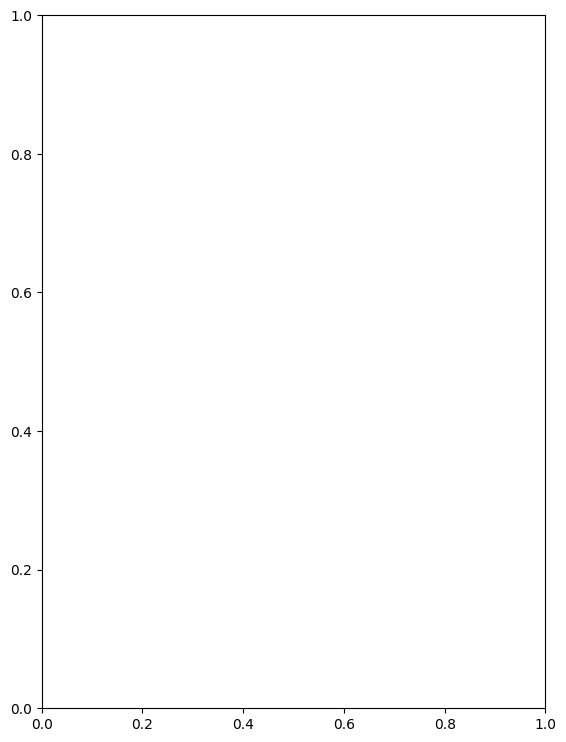

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(6.5, 9))

df = pd.read_csv(data_file)



# AlbuquerqueNM
row = df[df['Climate'] == 'Extreme']

gr_24 = row['24 hr Ratio']
gr_48 = row['48 hr Ratio']
gr_168 = row['168 hr Ratio']
set_hours = row['SET Hours']

R = np.corrcoef(gr_24, set_hours)[0,1]
R_Squared_24 = R*R

axs[0,0].plot(gr_24, set_hours, 'o', color='blue')
m_24, b_24 = np.polyfit(gr_24, set_hours, 1)
axs[0,0].plot(gr_24, m_24*gr_24+b_24, color='blue', label=('24 hr R2=' + str(round(R_Squared_24,3))))

ratio_alb = round(((216 - b_24) / m_24), 3)

R = np.corrcoef(gr_48, set_hours)[0,1]
R_Squared_48 = R*R

axs[0,0].plot(gr_48, set_hours, 'o', color='orange')
m_48, b_48 = np.polyfit(gr_48, set_hours, 1)
axs[0,0].plot(gr_48, m_48*gr_48+b_48, color='orange', label=('48 hr R2=' + str(round(R_Squared_48,3))))

R = np.corrcoef(gr_168, set_hours)[0,1]
R_Squared_168 = R*R

axs[0,0].plot(gr_168, set_hours, 'o', color='green')
m_168, b_168 = np.polyfit(gr_168, set_hours, 1)
axs[0,0].plot(gr_168, m_168*gr_168+b_168, color='green', label=('168 hr R2=' + str(round(R_Squared_168,3))))

axs[0,0].axhline(y=216, color='r', linestyle='--')
axs[0,0].set_xlim(0, 1)
# axs[0,0].set_xlabel('Degree Hour Ratio [°F Hr]')
axs[0,0].set_ylabel('SET Hours [°F Hr]')
axs[0,0].legend(loc='best', fontsize=6)
axs[0,0].set_title('Extreme\n Ratio = ' + str(ratio_alb), fontsize=8)

# ChicagoIL

row = df[df['Climate'] == 'Janurary3']

gr_24 = row['24 hr Ratio']
gr_48 = row['48 hr Ratio']
gr_168 = row['168 hr Ratio']
set_hours = row['SET Hours']

R = np.corrcoef(gr_24, set_hours)[0,1]
R_Squared_24 = R*R

axs[0,1].plot(gr_24, set_hours, 'o', color='blue')
m_24, b_24 = np.polyfit(gr_24, set_hours, 1)
axs[0,1].plot(gr_24, m_24*gr_24+b_24, color='blue', label=('24 hr R2=' + str(round(R_Squared_24,3))))

ratio_chi = round(((216 - b_24) / m_24), 3)

R = np.corrcoef(gr_48, set_hours)[0,1]
R_Squared_48 = R*R

axs[0,1].plot(gr_48, set_hours, 'o', color='orange')
m_48, b_48 = np.polyfit(gr_48, set_hours, 1)
axs[0,1].plot(gr_48, m_48*gr_48+b_48, color='orange', label=('48 hr R2=' + str(round(R_Squared_48,3))))

R = np.corrcoef(gr_168, set_hours)[0,1]
R_Squared_168 = R*R

axs[0,1].plot(gr_168, set_hours, 'o', color='green')
m_168, b_168 = np.polyfit(gr_168, set_hours, 1)
axs[0,1].plot(gr_168, m_168*gr_168+b_168, color='green', label=('168 hr R2=' + str(round(R_Squared_168,3))))

axs[0,1].axhline(y=216, color='r', linestyle='--')
axs[0,1].set_xlim(0, 1)
# axs[0,1].set_xlabel('Degree Hour Ratio [°F Hr]')
# axs[0,1].set_ylabel('SET Hours [°F Hr]')
axs[0,1].legend(loc='best', fontsize=6)
axs[0,1].set_title('Janurary3\n Ratio = ' + str(ratio_chi), fontsize=8)

# ElPasoTX

row = df[df['Climate'] == 'Feburary1']

gr_24 = row['24 hr Ratio']
gr_48 = row['48 hr Ratio']
gr_168 = row['168 hr Ratio']
set_hours = row['SET Hours']

R = np.corrcoef(gr_24, set_hours)[0,1]
R_Squared_24 = R*R

axs[1,0].plot(gr_24, set_hours, 'o', color='blue')
m_24, b_24 = np.polyfit(gr_24, set_hours, 1)
axs[1,0].plot(gr_24, m_24*gr_24+b_24, color='blue', label=('24 hr R2=' + str(round(R_Squared_24,3))))

ratio_ep = round(((216 - b_24) / m_24), 3)

R = np.corrcoef(gr_48, set_hours)[0,1]
R_Squared_48 = R*R

axs[1,0].plot(gr_48, set_hours, 'o', color='orange')
m_48, b_48 = np.polyfit(gr_48, set_hours, 1)
axs[1,0].plot(gr_48, m_48*gr_48+b_48, color='orange', label=('48 hr R2=' + str(round(R_Squared_48,3))))

R = np.corrcoef(gr_168, set_hours)[0,1]
R_Squared_168 = R*R

axs[1,0].plot(gr_168, set_hours, 'o', color='green')
m_168, b_168 = np.polyfit(gr_168, set_hours, 1)
axs[1,0].plot(gr_168, m_168*gr_168+b_168, color='green', label=('168 hr R2=' + str(round(R_Squared_168,3))))

axs[1,0].axhline(y=216, color='r', linestyle='--')
axs[1,0].set_xlim(0, 1)
# axs[1,0].set_xlabel('Degree Hour Ratio [°F Hr]')
axs[1,0].set_ylabel('SET Hours [°F Hr]')
axs[1,0].legend(loc='best', fontsize=6)
axs[1,0].set_title('Feburary1\n Ratio = ' + str(ratio_ep), fontsize=8)


# GreatFallsMT

row = df[df['Climate'] == 'Feburary']

gr_24 = row['24 hr Ratio']
gr_48 = row['48 hr Ratio']
gr_168 = row['168 hr Ratio']
set_hours = row['SET Hours']

R = np.corrcoef(gr_24, set_hours)[0,1]
R_Squared_24 = R*R
print(gr_24)

axs[1,1].plot(gr_24, set_hours, 'o', color='blue')
m_24, b_24 = np.polyfit(gr_24, set_hours, 1)
axs[1,1].plot(gr_24, m_24*gr_24+b_24, color='blue', label=('24 hr R2=' + str(round(R_Squared_24,3))))

ratio_gf = round(((216 - b_24) / m_24), 3)

R = np.corrcoef(gr_48, set_hours)[0,1]
R_Squared_48 = R*R

axs[1,1].plot(gr_48, set_hours, 'o', color='orange')
m_48, b_48 = np.polyfit(gr_48, set_hours, 1)
axs[1,1].plot(gr_48, m_48*gr_48+b_48, color='orange', label=('48 hr R2=' + str(round(R_Squared_48,3))))

R = np.corrcoef(gr_168, set_hours)[0,1]
R_Squared_168 = R*R

axs[1,1].plot(gr_168, set_hours, 'o', color='green')
m_168, b_168 = np.polyfit(gr_168, set_hours, 1)
axs[1,1].plot(gr_168, m_168*gr_168+b_168, color='green', label=('168 hr R2=' + str(round(R_Squared_168,3))))

axs[1,1].axhline(y=216, color='r', linestyle='--')
axs[1,1].set_xlim(0, 1)
# axs[1,1].set_xlabel('Degree Hour Ratio [°F Hr]')
# axs[1,1].set_ylabel('SET Hours [°F Hr]')
axs[1,1].legend(loc='best', fontsize=6)
axs[1,1].set_title('Feburary\n Ratio = ' + str(ratio_gf), fontsize=8)

# InternationalFallsMN

row = df[df['Climate'] == 'March']

gr_24 = row['24 hr Ratio']
gr_48 = row['48 hr Ratio']
gr_168 = row['168 hr Ratio']
set_hours = row['SET Hours']

R = np.corrcoef(gr_24, set_hours)[0,1]
R_Squared_24 = R*R

axs[2,0].plot(gr_24, set_hours, 'o', color='blue')
m_24, b_24 = np.polyfit(gr_24, set_hours, 1)
axs[2,0].plot(gr_24, m_24*gr_24+b_24, color='blue', label=('24 hr R2=' + str(round(R_Squared_24,3))))

ratio_if = round(((216 - b_24) / m_24), 3)

R = np.corrcoef(gr_48, set_hours)[0,1]
R_Squared_48 = R*R

axs[2,0].plot(gr_48, set_hours, 'o', color='orange')
m_48, b_48 = np.polyfit(gr_48, set_hours, 1)
axs[2,0].plot(gr_48, m_48*gr_48+b_48, color='orange', label=('48 hr R2=' + str(round(R_Squared_48,3))))

R = np.corrcoef(gr_168, set_hours)[0,1]
R_Squared_168 = R*R

axs[2,0].plot(gr_168, set_hours, 'o', color='green')
m_168, b_168 = np.polyfit(gr_168, set_hours, 1)
axs[2,0].plot(gr_168, m_168*gr_168+b_168, color='green', label=('168 hr R2=' + str(round(R_Squared_168,3))))

axs[2,0].axhline(y=216, color='r', linestyle='--')
axs[2,0].set_xlim(0, 1)
# axs[2,0].set_xlabel('Degree Hour Ratio [°F Hr]')
axs[2,0].set_ylabel('SET Hours [°F Hr]')
axs[2,0].legend(loc='best', fontsize=6)
axs[2,0].set_title('March\n Ratio = ' + str(ratio_if), fontsize=8)

# NashvilleTN

row = df[df['Climate'] == 'Janurary2']

gr_24 = row['24 hr Ratio']
gr_48 = row['48 hr Ratio']
gr_168 = row['168 hr Ratio']
set_hours = row['SET Hours']

R = np.corrcoef(gr_24, set_hours)[0,1]
R_Squared_24 = R*R

axs[2,1].plot(gr_24, set_hours, 'o', color='blue')
m_24, b_24 = np.polyfit(gr_24, set_hours, 1)
axs[2,1].plot(gr_24, m_24*gr_24+b_24, color='blue', label=('24 hr R2=' + str(round(R_Squared_24,3))))

ratio_nash = round(((216 - b_24) / m_24), 3)

R = np.corrcoef(gr_48, set_hours)[0,1]
R_Squared_48 = R*R

axs[2,1].plot(gr_48, set_hours, 'o', color='orange')
m_48, b_48 = np.polyfit(gr_48, set_hours, 1)
axs[2,1].plot(gr_48, m_48*gr_48+b_48, color='orange', label=('48 hr R2=' + str(round(R_Squared_48,3))))

R = np.corrcoef(gr_168, set_hours)[0,1]
R_Squared_168 = R*R

axs[2,1].plot(gr_168, set_hours, 'o', color='green')
m_168, b_168 = np.polyfit(gr_168, set_hours, 1)
axs[2,1].plot(gr_168, m_168*gr_168+b_168, color='green', label=('168 hr R2=' + str(round(R_Squared_168,3))))

axs[2,1].axhline(y=216, color='r', linestyle='--')
axs[2,1].set_xlim(0, 1)
# axs[2,1].set_xlabel('Degree Hour Ratio [°F Hr]')
# axs[2,1].set_ylabel('SET Hours [°F Hr]')
axs[2,1].legend(loc='best', fontsize=6)
axs[2,1].set_title('Janurary2\n Ratio = ' + str(ratio_nash), fontsize=8)

# TampaFL

row = df[df['Climate'] == 'Feburary2']

gr_24 = row['24 hr Ratio']
gr_48 = row['48 hr Ratio']
gr_168 = row['168 hr Ratio']
set_hours = row['SET Hours']

R = np.corrcoef(gr_24, set_hours)[0,1]
R_Squared_24 = R*R

axs[3,0].plot(gr_24, set_hours, 'o', color='blue')
m_24, b_24 = np.polyfit(gr_24, set_hours, 1)
axs[3,0].plot(gr_24, m_24*gr_24+b_24, color='blue', label=('24 hr R2=' + str(round(R_Squared_24,3))))

ratio_tf = round(((216 - b_24) / m_24), 3)

R = np.corrcoef(gr_48, set_hours)[0,1]
R_Squared_48 = R*R

axs[3,0].plot(gr_48, set_hours, 'o', color='orange')
m_48, b_48 = np.polyfit(gr_48, set_hours, 1)
axs[3,0].plot(gr_48, m_48*gr_48+b_48, color='orange', label=('48 hr R2=' + str(round(R_Squared_48,3))))

R = np.corrcoef(gr_168, set_hours)[0,1]
R_Squared_168 = R*R

axs[3,0].plot(gr_168, set_hours, 'o', color='green')
m_168, b_168 = np.polyfit(gr_168, set_hours, 1)
axs[3,0].plot(gr_168, m_168*gr_168+b_168, color='green', label=('168 hr R2=' + str(round(R_Squared_168,3))))

axs[3,0].axhline(y=216, color='r', linestyle='--')
axs[3,0].set_xlim(0, 1)
axs[3,0].set_xlabel('Degree Hour Ratio [°F Hr]')
axs[3,0].set_ylabel('SET Hours [°F Hr]')
axs[3,0].legend(loc='best', fontsize=6)
axs[3,0].set_title('Feburary2\n Ratio = ' + str(ratio_tf), fontsize=8)


# VancouverBC

row = df[df['Climate'] == 'April']

gr_24 = row['24 hr Ratio']
gr_48 = row['48 hr Ratio']
gr_168 = row['168 hr Ratio']
set_hours = row['SET Hours']

R = np.corrcoef(gr_24, set_hours)[0,1]
R_Squared_24 = R*R

axs[3,1].plot(gr_24, set_hours, 'o', color='blue')
m_24, b_24 = np.polyfit(gr_24, set_hours, 1)
axs[3,1].plot(gr_24, m_24*gr_24+b_24, color='blue', label=('24 hr R2=' + str(round(R_Squared_24,3))))

ratio_van = round(((216 - b_24) / m_24), 3)

R = np.corrcoef(gr_48, set_hours)[0,1]
R_Squared_48 = R*R

axs[3,1].plot(gr_48, set_hours, 'o', color='orange')
m_48, b_48 = np.polyfit(gr_48, set_hours, 1)
axs[3,1].plot(gr_48, m_48*gr_48+b_48, color='orange', label=('48 hr R2=' + str(round(R_Squared_48,3))))

R = np.corrcoef(gr_168, set_hours)[0,1]
R_Squared_168 = R*R

axs[3,1].plot(gr_168, set_hours, 'o', color='green')
m_168, b_168 = np.polyfit(gr_168, set_hours, 1)
axs[3,1].plot(gr_168, m_168*gr_168+b_168, color='green', label=('168 hr R2=' + str(round(R_Squared_168,3))))

axs[3,1].axhline(y=216, color='r', linestyle='--')
axs[3,1].set_xlim(0, 1)
axs[3,1].set_xlabel('Degree Hour Ratio [°F Hr]')
# axs[3,1].set_ylabel('SET Hours [°F Hr]')
axs[3,1].legend(loc='best', fontsize=6)
axs[3,1].set_title('April\n Ratio = ' + str(ratio_van), fontsize=8)



fig.tight_layout(pad=3)
fig.suptitle('Correlation of Degree Hours and SET Hours')






plt.show()

c:\Users\amitc_crl\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\amitc_crl\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
C:\Users\amitc_crl\AppData\Local\Temp\ipykernel_56148\3292739549.py:100: RuntimeWarning: divide by zero encountered in double_scalars
  ratio_ep = round(((216 - b_24) / m_24), 3)
C:\Users\amitc_crl\AppData\Local\Temp\ipykernel_56148\3292739549.py:257: RuntimeWarning: divide by zero encountered in double_scalars
  ratio_tf = round(((216 - b_24) / m_24), 3)


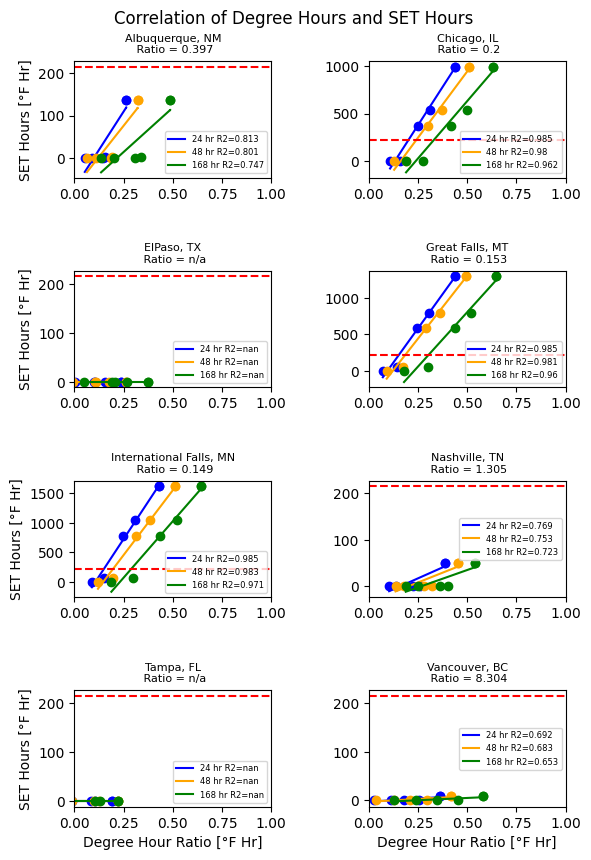

In [ ]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(6.5, 9))

df = pd.read_csv(data_file)



# AlbuquerqueNM
row = df[df['Climate'] == 'AlbuquerqueNM']

gr_24 = row['24 hr Ratio']
gr_48 = row['48 hr Ratio']
gr_168 = row['168 hr Ratio']
set_hours = row['SET Hours']

R = np.corrcoef(gr_24, set_hours)[0,1]
R_Squared_24 = R*R

axs[0,0].plot(gr_24, set_hours, 'o', color='blue')
m_24, b_24 = np.polyfit(gr_24, set_hours, 1)
axs[0,0].plot(gr_24, m_24*gr_24+b_24, color='blue', label=('24 hr R2=' + str(round(R_Squared_24,3))))

ratio_alb = round(((216 - b_24) / m_24), 3)

R = np.corrcoef(gr_48, set_hours)[0,1]
R_Squared_48 = R*R

axs[0,0].plot(gr_48, set_hours, 'o', color='orange')
m_48, b_48 = np.polyfit(gr_48, set_hours, 1)
axs[0,0].plot(gr_48, m_48*gr_48+b_48, color='orange', label=('48 hr R2=' + str(round(R_Squared_48,3))))

R = np.corrcoef(gr_168, set_hours)[0,1]
R_Squared_168 = R*R

axs[0,0].plot(gr_168, set_hours, 'o', color='green')
m_168, b_168 = np.polyfit(gr_168, set_hours, 1)
axs[0,0].plot(gr_168, m_168*gr_168+b_168, color='green', label=('168 hr R2=' + str(round(R_Squared_168,3))))

axs[0,0].axhline(y=216, color='r', linestyle='--')
axs[0,0].set_xlim(0, 1)
# axs[0,0].set_xlabel('Degree Hour Ratio [°F Hr]')
axs[0,0].set_ylabel('SET Hours [°F Hr]')
axs[0,0].legend(loc='best', fontsize=6)
axs[0,0].set_title('Albuquerque, NM\n Ratio = ' + str(ratio_alb), fontsize=8)

# ChicagoIL

row = df[df['Climate'] == 'ChicagoIL']

gr_24 = row['24 hr Ratio']
gr_48 = row['48 hr Ratio']
gr_168 = row['168 hr Ratio']
set_hours = row['SET Hours']

R = np.corrcoef(gr_24, set_hours)[0,1]
R_Squared_24 = R*R

axs[0,1].plot(gr_24, set_hours, 'o', color='blue')
m_24, b_24 = np.polyfit(gr_24, set_hours, 1)
axs[0,1].plot(gr_24, m_24*gr_24+b_24, color='blue', label=('24 hr R2=' + str(round(R_Squared_24,3))))

ratio_chi = round(((216 - b_24) / m_24), 3)

R = np.corrcoef(gr_48, set_hours)[0,1]
R_Squared_48 = R*R

axs[0,1].plot(gr_48, set_hours, 'o', color='orange')
m_48, b_48 = np.polyfit(gr_48, set_hours, 1)
axs[0,1].plot(gr_48, m_48*gr_48+b_48, color='orange', label=('48 hr R2=' + str(round(R_Squared_48,3))))

R = np.corrcoef(gr_168, set_hours)[0,1]
R_Squared_168 = R*R

axs[0,1].plot(gr_168, set_hours, 'o', color='green')
m_168, b_168 = np.polyfit(gr_168, set_hours, 1)
axs[0,1].plot(gr_168, m_168*gr_168+b_168, color='green', label=('168 hr R2=' + str(round(R_Squared_168,3))))

axs[0,1].axhline(y=216, color='r', linestyle='--')
axs[0,1].set_xlim(0, 1)
# axs[0,1].set_xlabel('Degree Hour Ratio [°F Hr]')
# axs[0,1].set_ylabel('SET Hours [°F Hr]')
axs[0,1].legend(loc='best', fontsize=6)
axs[0,1].set_title('Chicago, IL\n Ratio = ' + str(ratio_chi), fontsize=8)

# ElPasoTX

row = df[df['Climate'] == 'ElPasoTX']

gr_24 = row['24 hr Ratio']
gr_48 = row['48 hr Ratio']
gr_168 = row['168 hr Ratio']
set_hours = row['SET Hours']

R = np.corrcoef(gr_24, set_hours)[0,1]
R_Squared_24 = R*R

axs[1,0].plot(gr_24, set_hours, 'o', color='blue')
m_24, b_24 = np.polyfit(gr_24, set_hours, 1)
axs[1,0].plot(gr_24, m_24*gr_24+b_24, color='blue', label=('24 hr R2=' + str(round(R_Squared_24,3))))

ratio_ep = round(((216 - b_24) / m_24), 3)

R = np.corrcoef(gr_48, set_hours)[0,1]
R_Squared_48 = R*R

axs[1,0].plot(gr_48, set_hours, 'o', color='orange')
m_48, b_48 = np.polyfit(gr_48, set_hours, 1)
axs[1,0].plot(gr_48, m_48*gr_48+b_48, color='orange', label=('48 hr R2=' + str(round(R_Squared_48,3))))

R = np.corrcoef(gr_168, set_hours)[0,1]
R_Squared_168 = R*R

axs[1,0].plot(gr_168, set_hours, 'o', color='green')
m_168, b_168 = np.polyfit(gr_168, set_hours, 1)
axs[1,0].plot(gr_168, m_168*gr_168+b_168, color='green', label=('168 hr R2=' + str(round(R_Squared_168,3))))

axs[1,0].axhline(y=216, color='r', linestyle='--')
axs[1,0].set_xlim(0, 1)
# axs[1,0].set_xlabel('Degree Hour Ratio [°F Hr]')
axs[1,0].set_ylabel('SET Hours [°F Hr]')
axs[1,0].legend(loc='best', fontsize=6)
axs[1,0].set_title('ElPaso, TX\n Ratio = ' + str('n/a'), fontsize=8)


# GreatFallsMT

row = df[df['Climate'] == 'GreatFallsMT']

gr_24 = row['24 hr Ratio']
gr_48 = row['48 hr Ratio']
gr_168 = row['168 hr Ratio']
set_hours = row['SET Hours']

R = np.corrcoef(gr_24, set_hours)[0,1]
R_Squared_24 = R*R

axs[1,1].plot(gr_24, set_hours, 'o', color='blue')
m_24, b_24 = np.polyfit(gr_24, set_hours, 1)
axs[1,1].plot(gr_24, m_24*gr_24+b_24, color='blue', label=('24 hr R2=' + str(round(R_Squared_24,3))))

ratio_gf = round(((216 - b_24) / m_24), 3)

R = np.corrcoef(gr_48, set_hours)[0,1]
R_Squared_48 = R*R

axs[1,1].plot(gr_48, set_hours, 'o', color='orange')
m_48, b_48 = np.polyfit(gr_48, set_hours, 1)
axs[1,1].plot(gr_48, m_48*gr_48+b_48, color='orange', label=('48 hr R2=' + str(round(R_Squared_48,3))))

R = np.corrcoef(gr_168, set_hours)[0,1]
R_Squared_168 = R*R

axs[1,1].plot(gr_168, set_hours, 'o', color='green')
m_168, b_168 = np.polyfit(gr_168, set_hours, 1)
axs[1,1].plot(gr_168, m_168*gr_168+b_168, color='green', label=('168 hr R2=' + str(round(R_Squared_168,3))))

axs[1,1].axhline(y=216, color='r', linestyle='--')
axs[1,1].set_xlim(0, 1)
# axs[1,1].set_xlabel('Degree Hour Ratio [°F Hr]')
# axs[1,1].set_ylabel('SET Hours [°F Hr]')
axs[1,1].legend(loc='best', fontsize=6)
axs[1,1].set_title('Great Falls, MT\n Ratio = ' + str(ratio_gf), fontsize=8)

# InternationalFallsMN

row = df[df['Climate'] == 'InternationalFallsMN']

gr_24 = row['24 hr Ratio']
gr_48 = row['48 hr Ratio']
gr_168 = row['168 hr Ratio']
set_hours = row['SET Hours']

R = np.corrcoef(gr_24, set_hours)[0,1]
R_Squared_24 = R*R

axs[2,0].plot(gr_24, set_hours, 'o', color='blue')
m_24, b_24 = np.polyfit(gr_24, set_hours, 1)
axs[2,0].plot(gr_24, m_24*gr_24+b_24, color='blue', label=('24 hr R2=' + str(round(R_Squared_24,3))))

ratio_if = round(((216 - b_24) / m_24), 3)

R = np.corrcoef(gr_48, set_hours)[0,1]
R_Squared_48 = R*R

axs[2,0].plot(gr_48, set_hours, 'o', color='orange')
m_48, b_48 = np.polyfit(gr_48, set_hours, 1)
axs[2,0].plot(gr_48, m_48*gr_48+b_48, color='orange', label=('48 hr R2=' + str(round(R_Squared_48,3))))

R = np.corrcoef(gr_168, set_hours)[0,1]
R_Squared_168 = R*R

axs[2,0].plot(gr_168, set_hours, 'o', color='green')
m_168, b_168 = np.polyfit(gr_168, set_hours, 1)
axs[2,0].plot(gr_168, m_168*gr_168+b_168, color='green', label=('168 hr R2=' + str(round(R_Squared_168,3))))

axs[2,0].axhline(y=216, color='r', linestyle='--')
axs[2,0].set_xlim(0, 1)
# axs[2,0].set_xlabel('Degree Hour Ratio [°F Hr]')
axs[2,0].set_ylabel('SET Hours [°F Hr]')
axs[2,0].legend(loc='best', fontsize=6)
axs[2,0].set_title('International Falls, MN\n Ratio = ' + str(ratio_if), fontsize=8)

# NashvilleTN

row = df[df['Climate'] == 'NashvilleTN']

gr_24 = row['24 hr Ratio']
gr_48 = row['48 hr Ratio']
gr_168 = row['168 hr Ratio']
set_hours = row['SET Hours']

R = np.corrcoef(gr_24, set_hours)[0,1]
R_Squared_24 = R*R

axs[2,1].plot(gr_24, set_hours, 'o', color='blue')
m_24, b_24 = np.polyfit(gr_24, set_hours, 1)
axs[2,1].plot(gr_24, m_24*gr_24+b_24, color='blue', label=('24 hr R2=' + str(round(R_Squared_24,3))))

ratio_nash = round(((216 - b_24) / m_24), 3)

R = np.corrcoef(gr_48, set_hours)[0,1]
R_Squared_48 = R*R

axs[2,1].plot(gr_48, set_hours, 'o', color='orange')
m_48, b_48 = np.polyfit(gr_48, set_hours, 1)
axs[2,1].plot(gr_48, m_48*gr_48+b_48, color='orange', label=('48 hr R2=' + str(round(R_Squared_48,3))))

R = np.corrcoef(gr_168, set_hours)[0,1]
R_Squared_168 = R*R

axs[2,1].plot(gr_168, set_hours, 'o', color='green')
m_168, b_168 = np.polyfit(gr_168, set_hours, 1)
axs[2,1].plot(gr_168, m_168*gr_168+b_168, color='green', label=('168 hr R2=' + str(round(R_Squared_168,3))))

axs[2,1].axhline(y=216, color='r', linestyle='--')
axs[2,1].set_xlim(0, 1)
# axs[2,1].set_xlabel('Degree Hour Ratio [°F Hr]')
# axs[2,1].set_ylabel('SET Hours [°F Hr]')
axs[2,1].legend(loc='best', fontsize=6)
axs[2,1].set_title('Nashville, TN\n Ratio = ' + str(ratio_nash), fontsize=8)

# TampaFL

row = df[df['Climate'] == 'TampaFL']

gr_24 = row['24 hr Ratio']
gr_48 = row['48 hr Ratio']
gr_168 = row['168 hr Ratio']
set_hours = row['SET Hours']

R = np.corrcoef(gr_24, set_hours)[0,1]
R_Squared_24 = R*R

axs[3,0].plot(gr_24, set_hours, 'o', color='blue')
m_24, b_24 = np.polyfit(gr_24, set_hours, 1)
axs[3,0].plot(gr_24, m_24*gr_24+b_24, color='blue', label=('24 hr R2=' + str(round(R_Squared_24,3))))

ratio_tf = round(((216 - b_24) / m_24), 3)

R = np.corrcoef(gr_48, set_hours)[0,1]
R_Squared_48 = R*R

axs[3,0].plot(gr_48, set_hours, 'o', color='orange')
m_48, b_48 = np.polyfit(gr_48, set_hours, 1)
axs[3,0].plot(gr_48, m_48*gr_48+b_48, color='orange', label=('48 hr R2=' + str(round(R_Squared_48,3))))

R = np.corrcoef(gr_168, set_hours)[0,1]
R_Squared_168 = R*R

axs[3,0].plot(gr_168, set_hours, 'o', color='green')
m_168, b_168 = np.polyfit(gr_168, set_hours, 1)
axs[3,0].plot(gr_168, m_168*gr_168+b_168, color='green', label=('168 hr R2=' + str(round(R_Squared_168,3))))

axs[3,0].axhline(y=216, color='r', linestyle='--')
axs[3,0].set_xlim(0, 1)
axs[3,0].set_xlabel('Degree Hour Ratio [°F Hr]')
axs[3,0].set_ylabel('SET Hours [°F Hr]')
axs[3,0].legend(loc='best', fontsize=6)
axs[3,0].set_title('Tampa, FL\n Ratio = ' + str('n/a'), fontsize=8)


# VancouverBC

row = df[df['Climate'] == 'VancouverBC']

gr_24 = row['24 hr Ratio']
gr_48 = row['48 hr Ratio']
gr_168 = row['168 hr Ratio']
set_hours = row['SET Hours']

R = np.corrcoef(gr_24, set_hours)[0,1]
R_Squared_24 = R*R

axs[3,1].plot(gr_24, set_hours, 'o', color='blue')
m_24, b_24 = np.polyfit(gr_24, set_hours, 1)
axs[3,1].plot(gr_24, m_24*gr_24+b_24, color='blue', label=('24 hr R2=' + str(round(R_Squared_24,3))))

ratio_van = round(((216 - b_24) / m_24), 3)

R = np.corrcoef(gr_48, set_hours)[0,1]
R_Squared_48 = R*R

axs[3,1].plot(gr_48, set_hours, 'o', color='orange')
m_48, b_48 = np.polyfit(gr_48, set_hours, 1)
axs[3,1].plot(gr_48, m_48*gr_48+b_48, color='orange', label=('48 hr R2=' + str(round(R_Squared_48,3))))

R = np.corrcoef(gr_168, set_hours)[0,1]
R_Squared_168 = R*R

axs[3,1].plot(gr_168, set_hours, 'o', color='green')
m_168, b_168 = np.polyfit(gr_168, set_hours, 1)
axs[3,1].plot(gr_168, m_168*gr_168+b_168, color='green', label=('168 hr R2=' + str(round(R_Squared_168,3))))

axs[3,1].axhline(y=216, color='r', linestyle='--')
axs[3,1].set_xlim(0, 1)
axs[3,1].set_xlabel('Degree Hour Ratio [°F Hr]')
# axs[3,1].set_ylabel('SET Hours [°F Hr]')
axs[3,1].legend(loc='best', fontsize=6)
axs[3,1].set_title('Vancouver, BC\n Ratio = ' + str(ratio_van), fontsize=8)



fig.tight_layout(pad=3)
fig.suptitle('Correlation of Degree Hours and SET Hours')






plt.show()